# Testing Cases Outline

Here we asses how each texture feature differs across the bernoulli settings. Paragraph reports for each feature and plots; what do they highlight in any sudden patterns out of the randomness (look at certain cases of the samples), how are they affected by bernoulli settings.

In [746]:
from src.glcm_features.features import (compute_glcms, pre_feature_statistics, 
                                        compute_autocorrelation,      
                                        compute_cluster_prominence, 
                                        compute_cluster_shade,
                                        compute_dissimilarity,
                                        compute_entropy,
                                        compute_difference_entropy,
                                        compute_difference_variance,
                                        compute_inverse_difference,
                                        compute_sum_average,
                                        compute_sum_entropy,
                                        compute_sum_of_squares,
                                        compute_sum_variance,
                                        compute_information_measure_correlation_1,
                                        compute_information_measure_correlation_2
                                        )

import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import patches
from matplotlib import axes
from skimage.feature import graycomatrix, graycoprops

## Image Generation
randomly generated 8x8 images using bernoulli iid for each pixel. 
take over 100 samples of images generated for each bernoulli setting and record the mean 

p = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9 ]

In [377]:
def compute_samples(bernoulli_settings, num_samples=100, size=(8, 8)):
    image_samples = {}
    sample_features = {}
    
    for p in bernoulli_settings:
        samples_list = []
        features_list = []

        for i in range(num_samples):
            image = (np.random.rand(*size) < p).astype(int)
            samples_list.append(image)
            
            glcm = pre_feature_statistics(compute_glcms(image, levels = 2)['mean'])['Pij']
            contrast = graycoprops(glcm, 'contrast')[0,0]
            energy = graycoprops(glcm, 'energy')[0,0]
            homogeneity = graycoprops(glcm, 'homogeneity')[0,0]
            correlation = graycoprops(glcm, 'correlation')[0,0]

            glcm_stats = pre_feature_statistics(compute_glcms(image, levels = 2)['mean'])
            autocorrelation = compute_autocorrelation(glcm_stats)
            cluster_prominence = compute_cluster_prominence(glcm_stats)
            cluster_shade = compute_cluster_shade(glcm_stats)
            dissimilarity = compute_dissimilarity(glcm_stats)
            entropy = compute_entropy(glcm_stats)
            difference_entropy = compute_difference_entropy(glcm_stats)
            difference_variance = compute_difference_variance(glcm_stats)
            inverse_difference = compute_inverse_difference(glcm_stats)
            imc1 = compute_information_measure_correlation_1(glcm_stats)
            imc2 = compute_information_measure_correlation_2(glcm_stats)
            sum_average = compute_sum_average(glcm_stats)
            sum_entropy = compute_sum_entropy(glcm_stats)
            sum_of_squares = compute_sum_of_squares(glcm_stats)
            sum_variance = compute_sum_variance(glcm_stats)
            
            imc1 = np.array(imc1).item()
            imc2 = np.array(imc2).item()
    
            features = [contrast, energy, homogeneity, correlation, 
                        autocorrelation, cluster_prominence, cluster_shade, dissimilarity, entropy, 
                        difference_entropy, difference_variance, inverse_difference, imc1, imc2,
                        sum_average, sum_entropy, sum_of_squares, sum_variance, np.squeeze(glcm), image]
            features_list.append(features)
            
        image_samples[p] = samples_list
        sample_features[p] = features_list
        
    return image_samples, sample_features

In [378]:
np.random.seed(25)
BERNOULLI_SETTINGS = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
_, sample_features = compute_samples(BERNOULLI_SETTINGS, num_samples = 500)

In [380]:
FEATURE_NAMES = [
    "contrast",
    "energy",
    "homogeneity",
    "correlation",
    "autocorrelation",
    "cluster_prominence",
    "cluster_shade",
    "dissimilarity",
    "entropy",
    "difference_entropy",
    "difference_variance",
    "inverse_difference",
    "imc1",
    "imc2",
    "sum_average",
    "sum_entropy",
    "sum_of_squares",
    "sum_variance",
    "glcm",
    "image"
]

rows = []
indices = []

for p, features_list in sample_features.items():
    for i, features in enumerate(features_list, start=1):
        rows.append(features)
        indices.append(f"{p}_{i}")


df = pd.DataFrame(rows, columns=FEATURE_NAMES, index=indices)

In [381]:
df['autocorrelation'] = df['autocorrelation'].apply(lambda x: x[0]).astype(float)
df['cluster_prominence'] = df['cluster_prominence'].apply(lambda x: x[0][0]).astype(float)
df['cluster_shade'] = df['cluster_shade'].apply(lambda x: x[0][0]).astype(float)
df['dissimilarity'] = df['dissimilarity'].apply(lambda x: x[0][0]).astype(float)
df['entropy'] = df['entropy'].apply(lambda x: x[0][0]).astype(float)
df['inverse_difference'] = df['inverse_difference'].apply(lambda x: x[0][0]).astype(float)
df['sum_of_squares'] = df['sum_of_squares'].apply(lambda x: x[0][0]).astype(float)


df['p'] = df.index.str.split('_').str[0].astype(float)

In [673]:
df.sample()

,contrast,energy,homogeneity,correlation,autocorrelation,cluster_prominence,cluster_shade,dissimilarity,entropy,difference_entropy,...,inverse_difference,imc1,imc2,sum_average,sum_entropy,sum_of_squares,sum_variance,glcm,image,p
0.1_472,0.142857,0.853697,0.928571,0.040302,1.171429,0.139645,0.179777,0.142857,0.561146,0.410116,...,0.928571,-0.002489,0.038142,2.161905,0.462442,0.070385,0.154739,"[[0.8476190476190476, 0.0761904761904762], [0....","[[0, 0, 0, 0, 0, 0, 0, 0], [0, 0, 0, 0, 1, 0, ...",0.1


## Autocorrelation

$$ \sum^{N}_{i=1} \sum^{N}_{j=1} (i \cdot j) p(i, j) $$

Put simply, autocorrelation gives the sum of the products of expected vlaues $\big( E[p(i, j)] = E[p_x(i)]E[p_y(j)] = (i \cdot j) p(i, j) \big)$. If we assume $N$ to be held constant, the distribution of the GLCM entries heavily determine the value of this feature. So if an image is relatively brighter autocorrelation will return a higher value.

As i or j increase the function increases. In terms of GLCMs as the indicies distance from the (1,1) entry increases the higher the wieghting of that entry; This means dark pixels co-occur with dark pixels, or low-intensity regions are dominant. 
The most bottom right entry $(N,N)$, has the highest possible weight. This means bright pixels co-occur with bright pixels. 
Also The top right and bottom left corners both have higher weights. In the image bright pixels co-occur with bright pixels.

* Autocorrelation is a measure of the magnitude of the fineness and coarseness of texture (pyradiomics). 
* It measures the coarseness of an image and evaluates the linear spatial relationships between texture primitives (Parmer et al.).

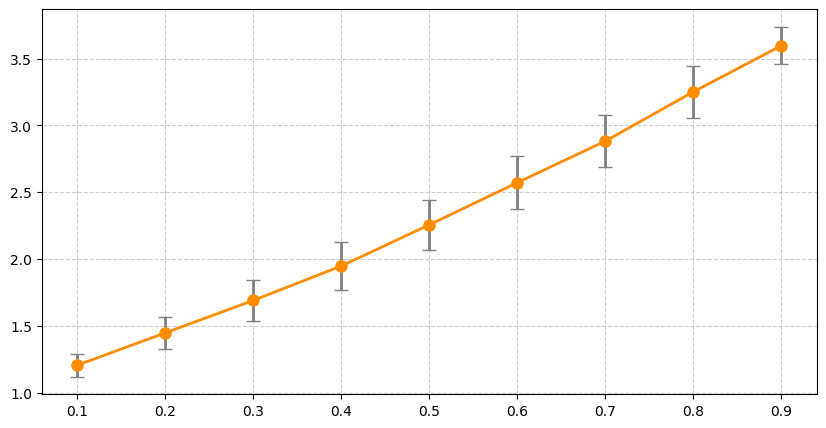

In [385]:
avg_autocorrelation = [np.mean([features[4] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_autocorrelation = [np.std([features[4] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_autocorrelation, yerr=std_autocorrelation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

#### Here are samples that produced the lowest and highest autocorrelation, respectively for each random variable setting.

In [681]:
df[df['p'] == 0.1].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.1_35,1.023810
0.1_46,1.038095
0.1_72,1.038095


In [676]:
df['glcm']['0.1_35']

array([[0.97619048, 0.01904762],
       [0.0047619 , 0.        ]])

In [677]:
df['glcm']['0.1_46']

array([[0.96190476, 0.01904762],
       [0.01904762, 0.        ]])

In [682]:
df[df['p'] == 0.1].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.1_118,1.690476
0.1_245,1.476190
0.1_301,1.476190


In [679]:
df['glcm']['0.1_118']

array([[0.48095238, 0.20952381],
       [0.22380952, 0.08571429]])

In [680]:
df['glcm']['0.1_245']

array([[0.6       , 0.1952381 ],
       [0.16666667, 0.03809524]])

In [684]:
df[df['p'] == 0.2].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.2_348,1.138095
0.2_191,1.142857
0.2_475,1.166667


In [683]:
df[df['p'] == 0.2].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.2_125,1.866667
0.2_215,1.828571
0.2_116,1.804762


In [685]:
df[df['p'] == 0.3].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.3_456,1.252381
0.3_305,1.319048
0.3_113,1.328571


In [686]:
df[df['p'] == 0.3].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.3_110,2.261905
0.3_236,2.128571
0.3_379,2.066667


In [687]:
df[df['p'] == 0.4].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.4_7,1.480952
0.4_452,1.509524
0.4_13,1.538095


In [688]:
df[df['p'] == 0.4].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.4_12,2.590476
0.4_101,2.452381
0.4_462,2.428571


In [689]:
df[df['p'] == 0.5].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.5_330,1.757143
0.5_235,1.800000
0.5_72,1.800000


In [690]:
df[df['p'] == 0.5].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.5_76,2.895238
0.5_497,2.771429
0.5_57,2.747619


In [691]:
df[df['p'] == 0.6].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.6_238,1.985714
0.6_324,2.019048
0.6_260,2.033333


In [692]:
df[df['p'] == 0.6].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.6_163,3.261905
0.6_443,3.138095
0.6_455,3.138095


In [693]:
df[df['p'] == 0.7].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.7_143,2.371429
0.7_238,2.409524
0.7_462,2.423810


In [694]:
df[df['p'] == 0.7].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.7_60,3.400000
0.7_367,3.366667
0.7_448,3.338095


In [695]:
df[df['p'] == 0.8].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.8_408,2.504762
0.8_279,2.642857
0.8_348,2.657143


In [696]:
df[df['p'] == 0.8].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.8_492,3.785714
0.8_134,3.723810
0.8_92,3.719048


In [697]:
df[df['p'] == 0.9].sort_values(by='autocorrelation').head(3)[['autocorrelation']]

,autocorrelation
0.9_56,3.152381
0.9_61,3.161905
0.9_112,3.200000


In [698]:
df[df['p'] == 0.9].sort_values(by='autocorrelation', ascending=False).head(3)[['autocorrelation']]

,autocorrelation
0.9_21,3.923810
0.9_100,3.923810
0.9_468,3.904762


#### Plots

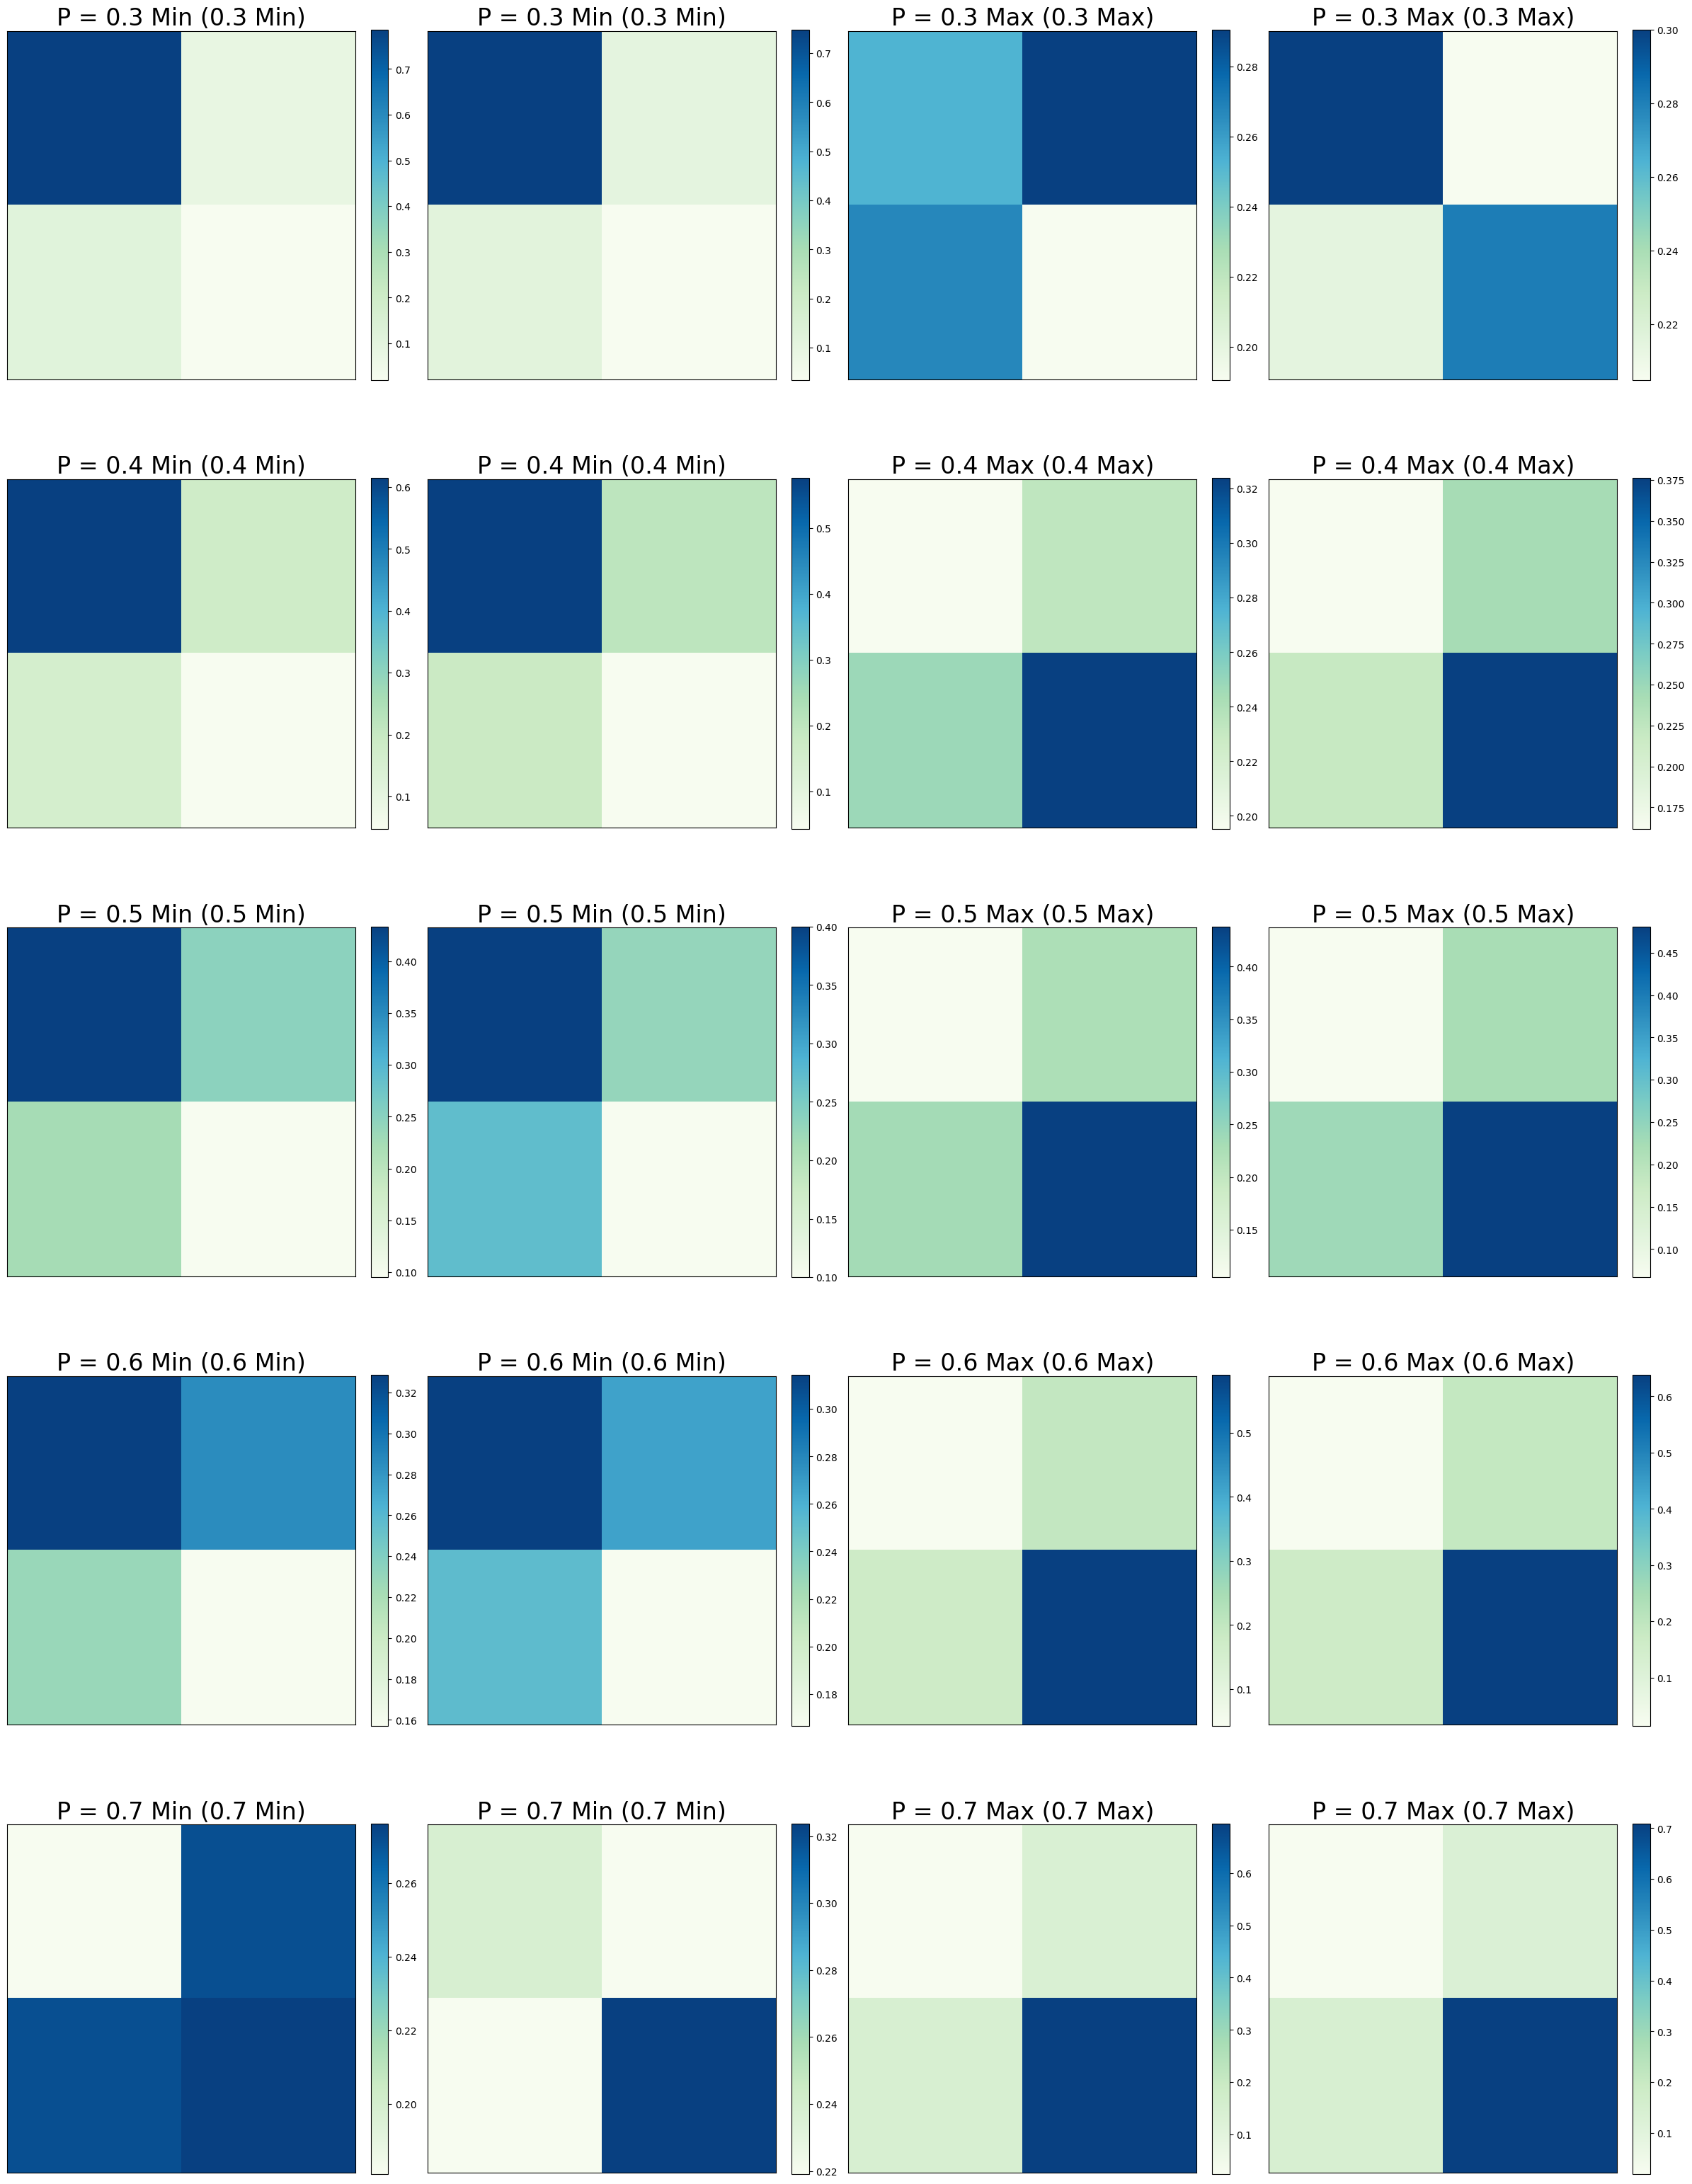

In [744]:
autocorr_keys = [
    '0.3_456', '0.3_305', '0.3_236', '0.3_110',
    '0.4_7', '0.4_452', '0.4_101', '0.4_12',
    '0.5_330', '0.5_235', '0.5_497', '0.5_76',
    '0.6_238', '0.6_324', '0.6_443', '0.6_163',
    '0.7_143', '0.7_238', '0.7_367', '0.7_60'
]

autocorr_titles = [
    '0.3 Min', '0.3 Min', '0.3 Max', '0.3 Max',
    '0.4 Min', '0.4 Min', '0.4 Max', '0.4 Max',
    '0.5 Min', '0.5 Min', '0.5 Max', '0.5 Max',
    '0.6 Min', '0.6 Min', '0.6 Max', '0.6 Max',
    '0.7 Min', '0.7 Min', '0.7 Max', '0.7 Max'
]

fig, axes = plt.subplots(5, 4, figsize=(24, 32))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = autocorr_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'P = {autocorr_titles[i]} ({autocorr_titles[i]})', fontsize=24)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

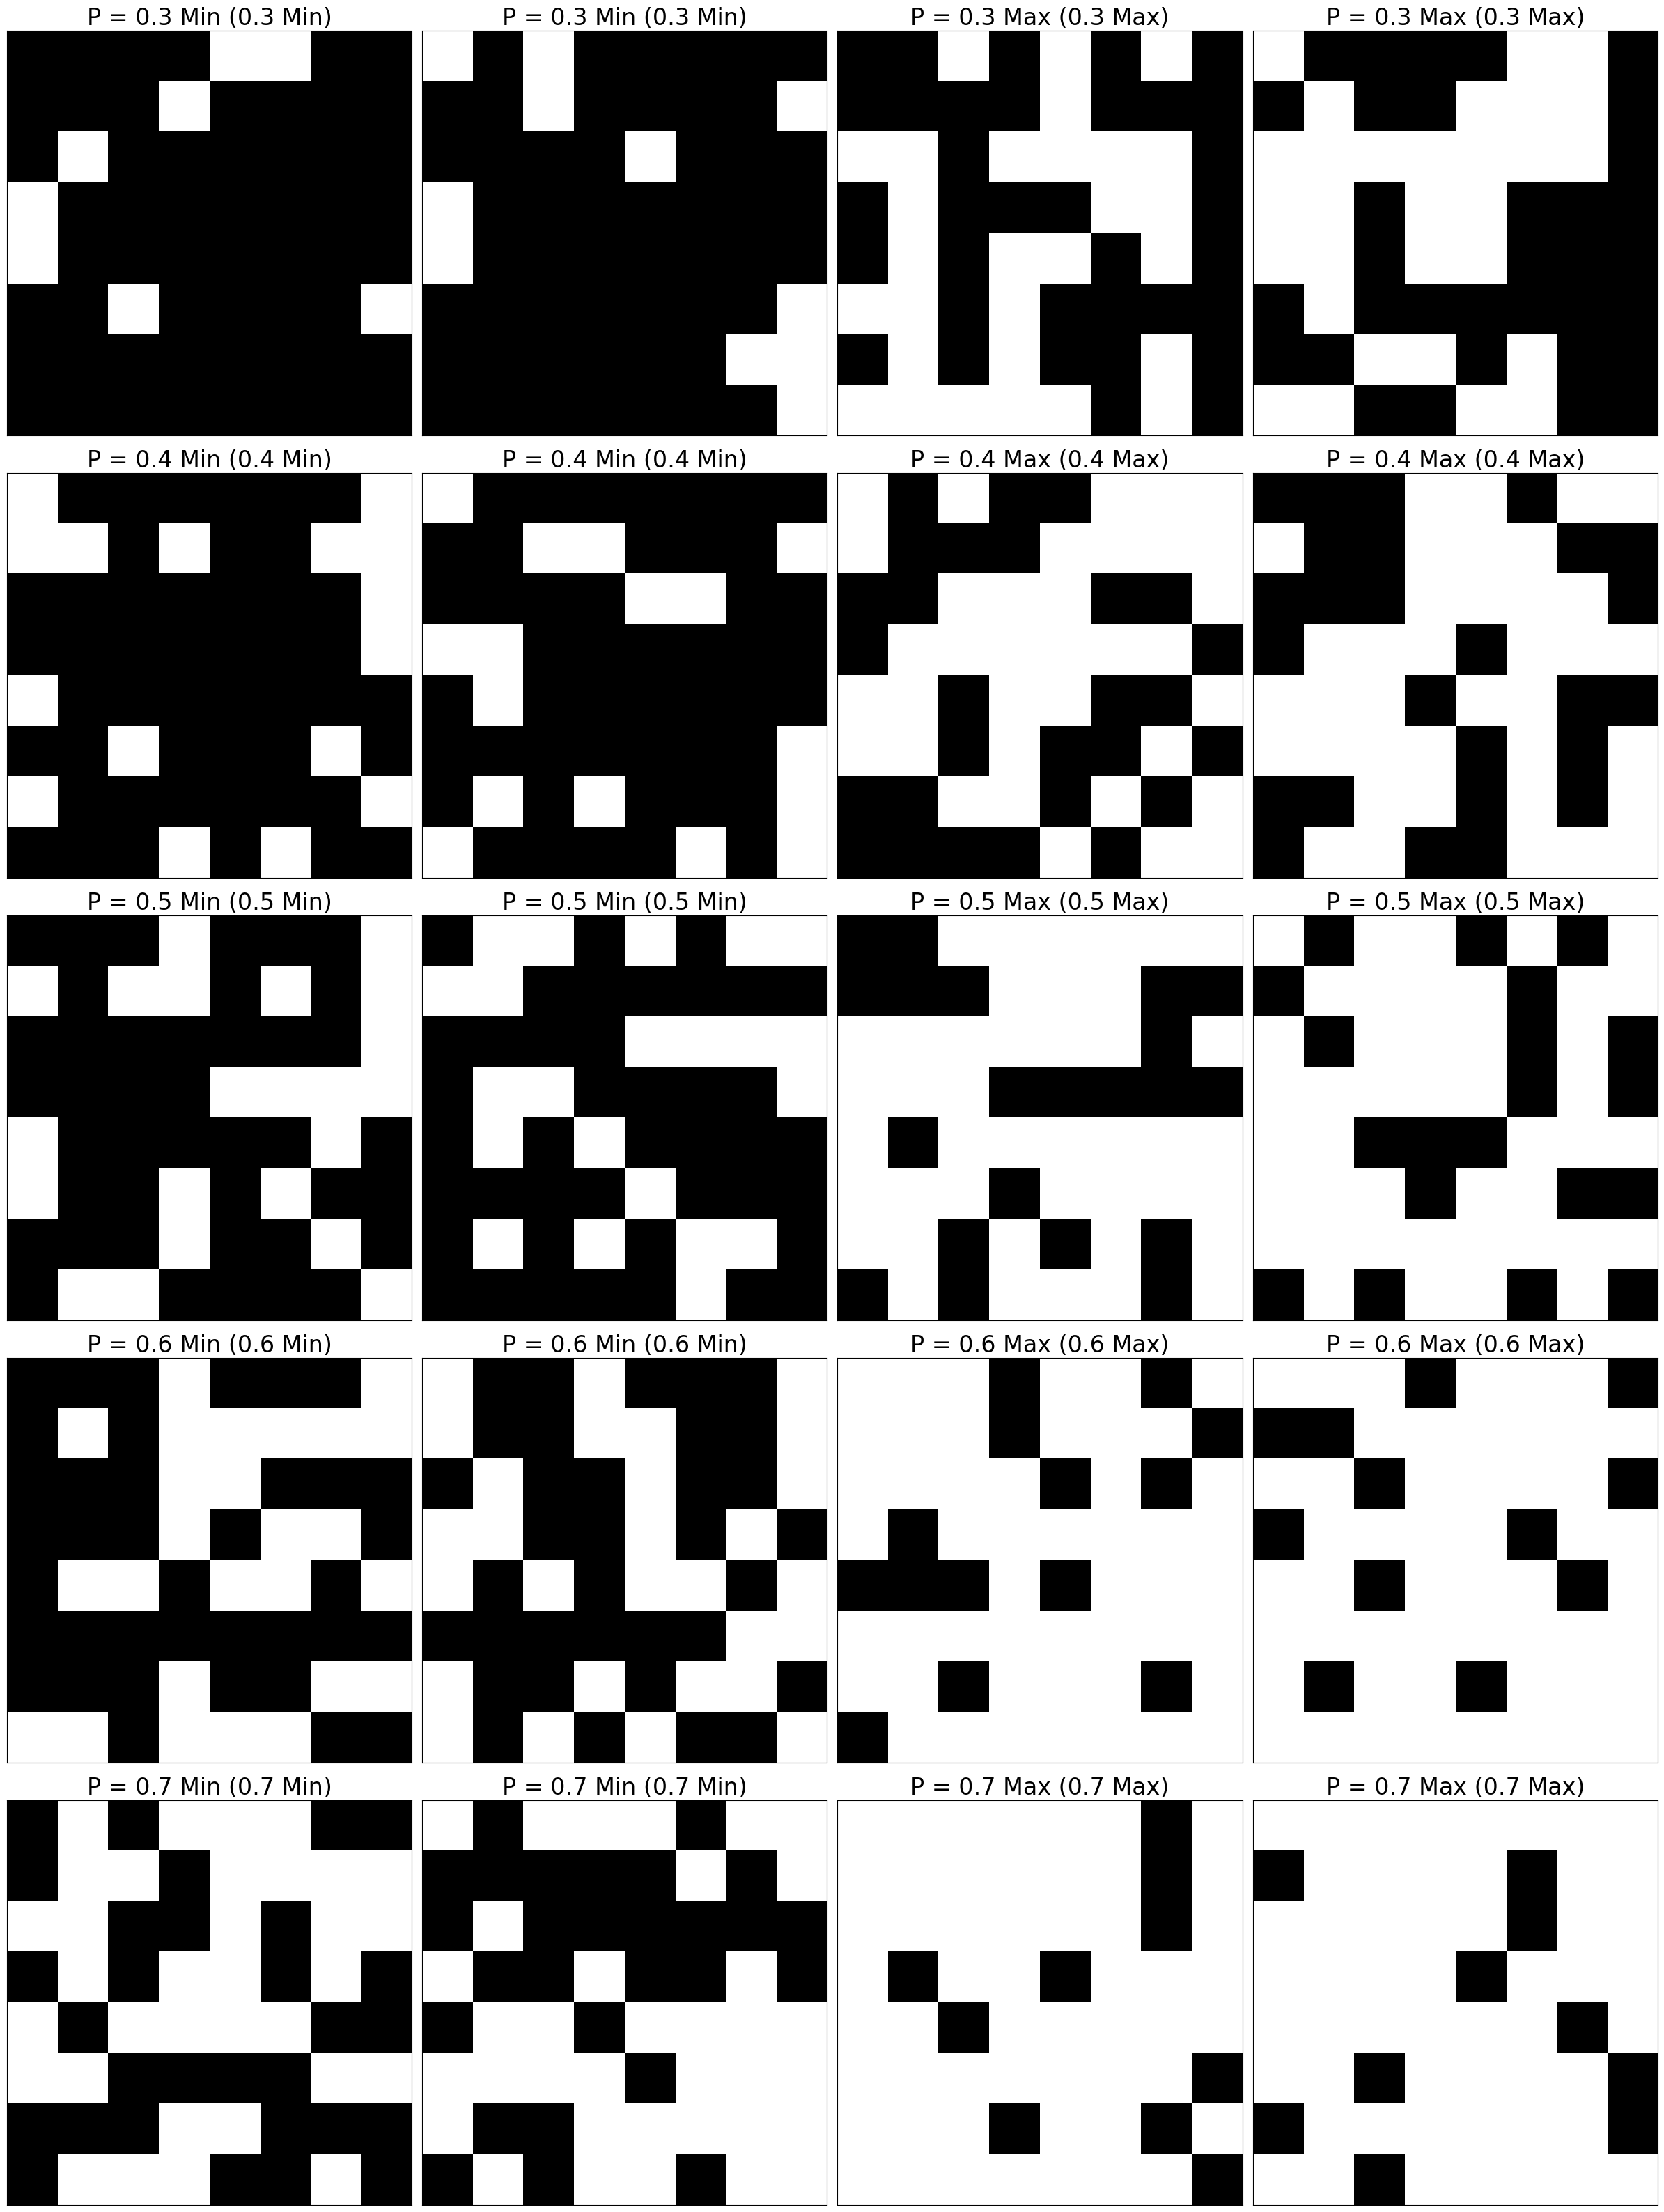

In [745]:
fig, axes = plt.subplots(5, 4, figsize=(24, 32))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = autocorr_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'P = {autocorr_titles[i]} ({autocorr_titles[i]})', fontsize=24)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Cluster prominence

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - \mu_x - \mu_y)^4 p(i, j) $$
Aslo written as:
$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - 2\mu)^4 p(i, j) $$


$\mu_x$ and $\mu_y$ are the mean gray levels of the rows and columns of the GLCM. They represent the "center of mass" or the average intensity co-occurrence in the matrix.

The wieght can be rewritten as $(i- \mu_x)+(j- \mu_y)$, the sum of deviations from the mean. This term measures the distance of a specific co-occurrence $(i, j)$ from the mean. The sum $(i+j)$ is compared against the sum of the means $(\mu_x + \mu_y)$, so this feature focuses on how much the texture "protrudes" from the average. Since the difference is raised to the 4th power, it heavily penalizes entries that are far away from the center of the GLCM. This would also ensure a positive value $\big( (-a)^4 = a^4 \big)$

Cluster prominence is a measure of the asymmetry of the image. A High cluster prominence indicates the image is not visually "smooth"; it suggests the presence of distinct, high contrast clusters (very bright or very dark areas) that stand out against the background ($ 2\mu$). A low cluster prominence indicates that the GLCM is concentrated near the mean. The image is likely more uniform.

* It measures local intensity variation (Parmer et al.).
* Cluster Prominence is a measure of the skewness and asymmetry of the GLCM. A higher values implies more asymmetry about the mean while a lower value indicates a peak near the mean value and less variation about the mean (pyradiomics)

Note: In Lofstedt et al. it is raised to the 3rd power instead of the 4th.

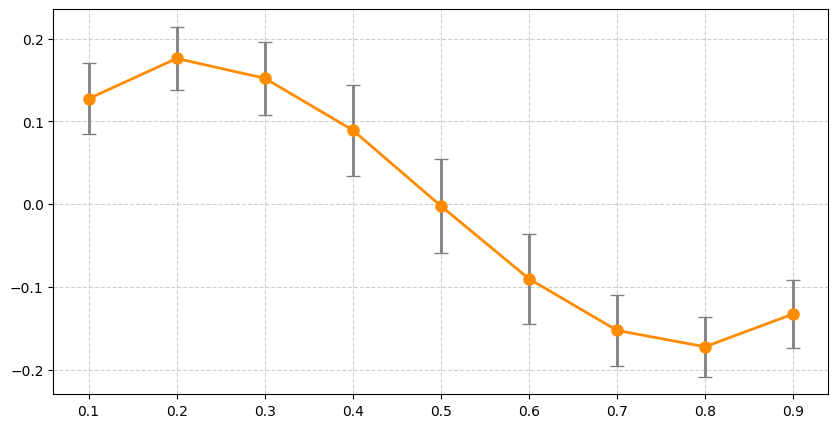

In [662]:
avg_clusterprom = [np.mean([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clusterprom = [np.std([features[5] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clusterprom, yerr=std_clusterprom, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Cluster shade

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - \mu_x - \mu_y)^3 p(i, j) $$
Aslo written as:
$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - 2\mu)^3 p(i, j) $$

Similar to the interpetation of cluster prominence; except that this function is raised to the third power. This allows for negative values. 

* Cluster Shade is a measure of the skewness and uniformity of the GLCM. A higher cluster shade implies greater asymmetry about the mean (pyradiomics).
* Cluster shade and cluster prominence are measures of skewness of the matrix, in other words the lack of symmetry. When cluster shade and cluster prominence are high, the image is ot symmetric. (Parmer et al.)

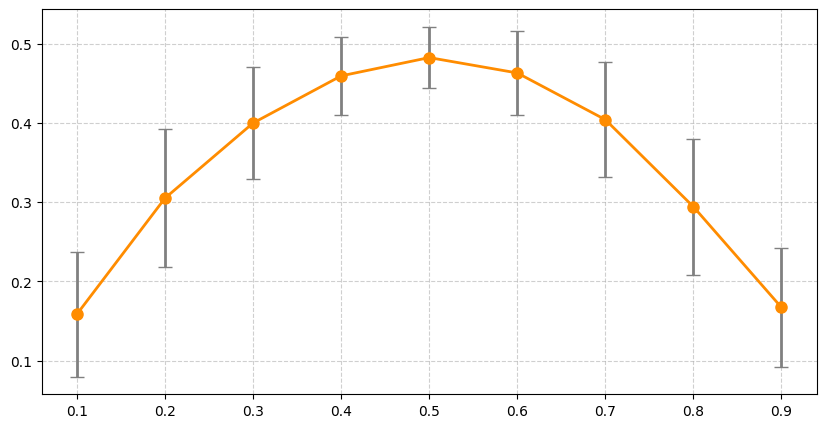

In [661]:
avg_clusterprom = [np.mean([features[6] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_clusterprom = [np.std([features[6] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_clusterprom, yerr=std_clusterprom, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Cluster Tendency

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i + j - \mu_x - \mu_y)^2 p(i, j) $$

Similar to the interpetation of cluster prominence. 

* Cluster Tendency is a measure of groupings of voxels with similar gray-level values. (pyradiomics)

## Contrast

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} (i - j)^2 p(i, j) $$

The term $(i - j)^2$ acts as a weighting kernel that measures the squared distance from the main diagonal of the GLCM. When $i - j = 0$, the weighting is zero. These entries represent pixels with identical intensities occurring in the specified spatial relationship.
The weighting increases quadratically as the distance $|i - j|$ increases. Consequently, this feature is highly sensitive to entries in the "far corners" of the matrix which represent transitions between extreme dark and extreme bright pixels.

If the probability mass of $p(i, j)$ is concentrated on or near the main diagonal, the summation remains small. In an image this translates to a homogeneous image where neighboring pixels have very similar gray levels. In this case, the GLCM is "diagonal-dominant".

If the mass is widely distributed across the off-diagonals, the contrast value grows. This indicates more frequent large intensity transitions. Which, in an image, can corresponds to sharp edges, high-frequency noise, or heavy texture.
 
* Contrast is a measure of the local intensity variation, favoring values away from the diagonal. A larger value correlates with a greater disparity in intensity values among neighboring voxels (pyradiomics).
* It measures local intensity variation (Parmer et al.).

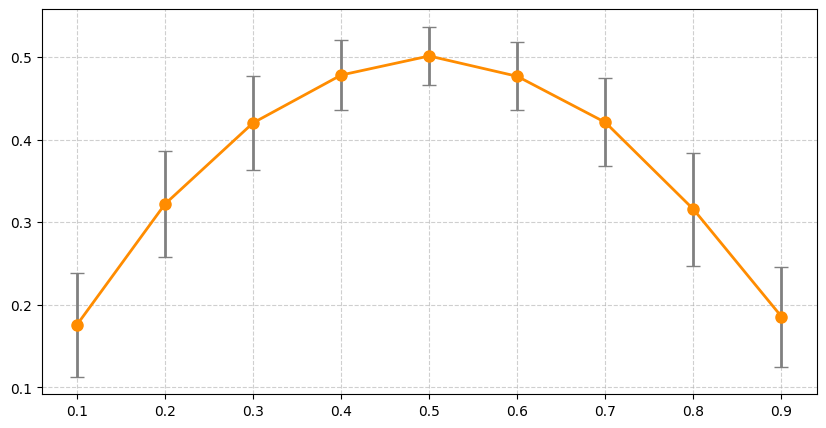

In [403]:
avg_contrast = [np.mean([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_contrast = [np.std([features[0] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
# plt.plot(BERNOULLI_SETTINGS, [sample_features[p][0][1] for p in BERNOULLI_SETTINGS], marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
# plt.plot(BERNOULLI_SETTINGS, avg_image_contrast, marker='o', linestyle='-', color='indigo', linewidth=2, markersize=8)
plt.errorbar(BERNOULLI_SETTINGS, avg_contrast, yerr=std_contrast, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

In [718]:
df[df['p'] == 0.1].sort_values(by='contrast').head(3)[['contrast']]

,contrast
0.1_35,0.023810
0.1_364,0.038095
0.1_72,0.038095


In [719]:
df[df['p'] == 0.1].sort_values(by='contrast', ascending=False).head(3)[['contrast']]

,contrast
0.1_118,0.433333
0.1_245,0.361905
0.1_353,0.352381


In [728]:
df[df['p'] == 0.2].sort_values(by='contrast').head(3)[['contrast']]

,contrast
0.2_191,0.128571
0.2_348,0.138095
0.2_475,0.152381


In [721]:
df[df['p'] == 0.2].sort_values(by='contrast', ascending=False).head(3)[['contrast']]

,contrast
0.2_215,0.528571
0.2_113,0.490476
0.2_423,0.485714


In [722]:
df[df['p'] == 0.3].sort_values(by='contrast').head(3)[['contrast']]

,contrast
0.3_456,0.195238
0.3_305,0.219048
0.3_113,0.228571


In [723]:
df[df['p'] == 0.3].sort_values(by='contrast', ascending=False).head(3)[['contrast']]

,contrast
0.3_343,0.576190
0.3_236,0.557143
0.3_247,0.557143


In [724]:
df[df['p'] == 0.4].sort_values(by='contrast').head(3)[['contrast']]

,contrast
0.4_7,0.338095
0.4_311,0.342857
0.4_477,0.347619


In [725]:
df[df['p'] == 0.4].sort_values(by='contrast', ascending=False).head(3)[['contrast']]

,contrast
0.4_315,0.585714
0.4_293,0.571429
0.4_147,0.557143


In [726]:
df[df['p'] == 0.5].sort_values(by='contrast').head(3)[['contrast']]

,contrast
0.5_217,0.380952
0.5_5,0.380952
0.5_366,0.385714


In [727]:
df[df['p'] == 0.5].sort_values(by='contrast', ascending=False).head(3)[['contrast']]

,contrast
0.5_2,0.585714
0.5_257,0.580952
0.5_491,0.576190


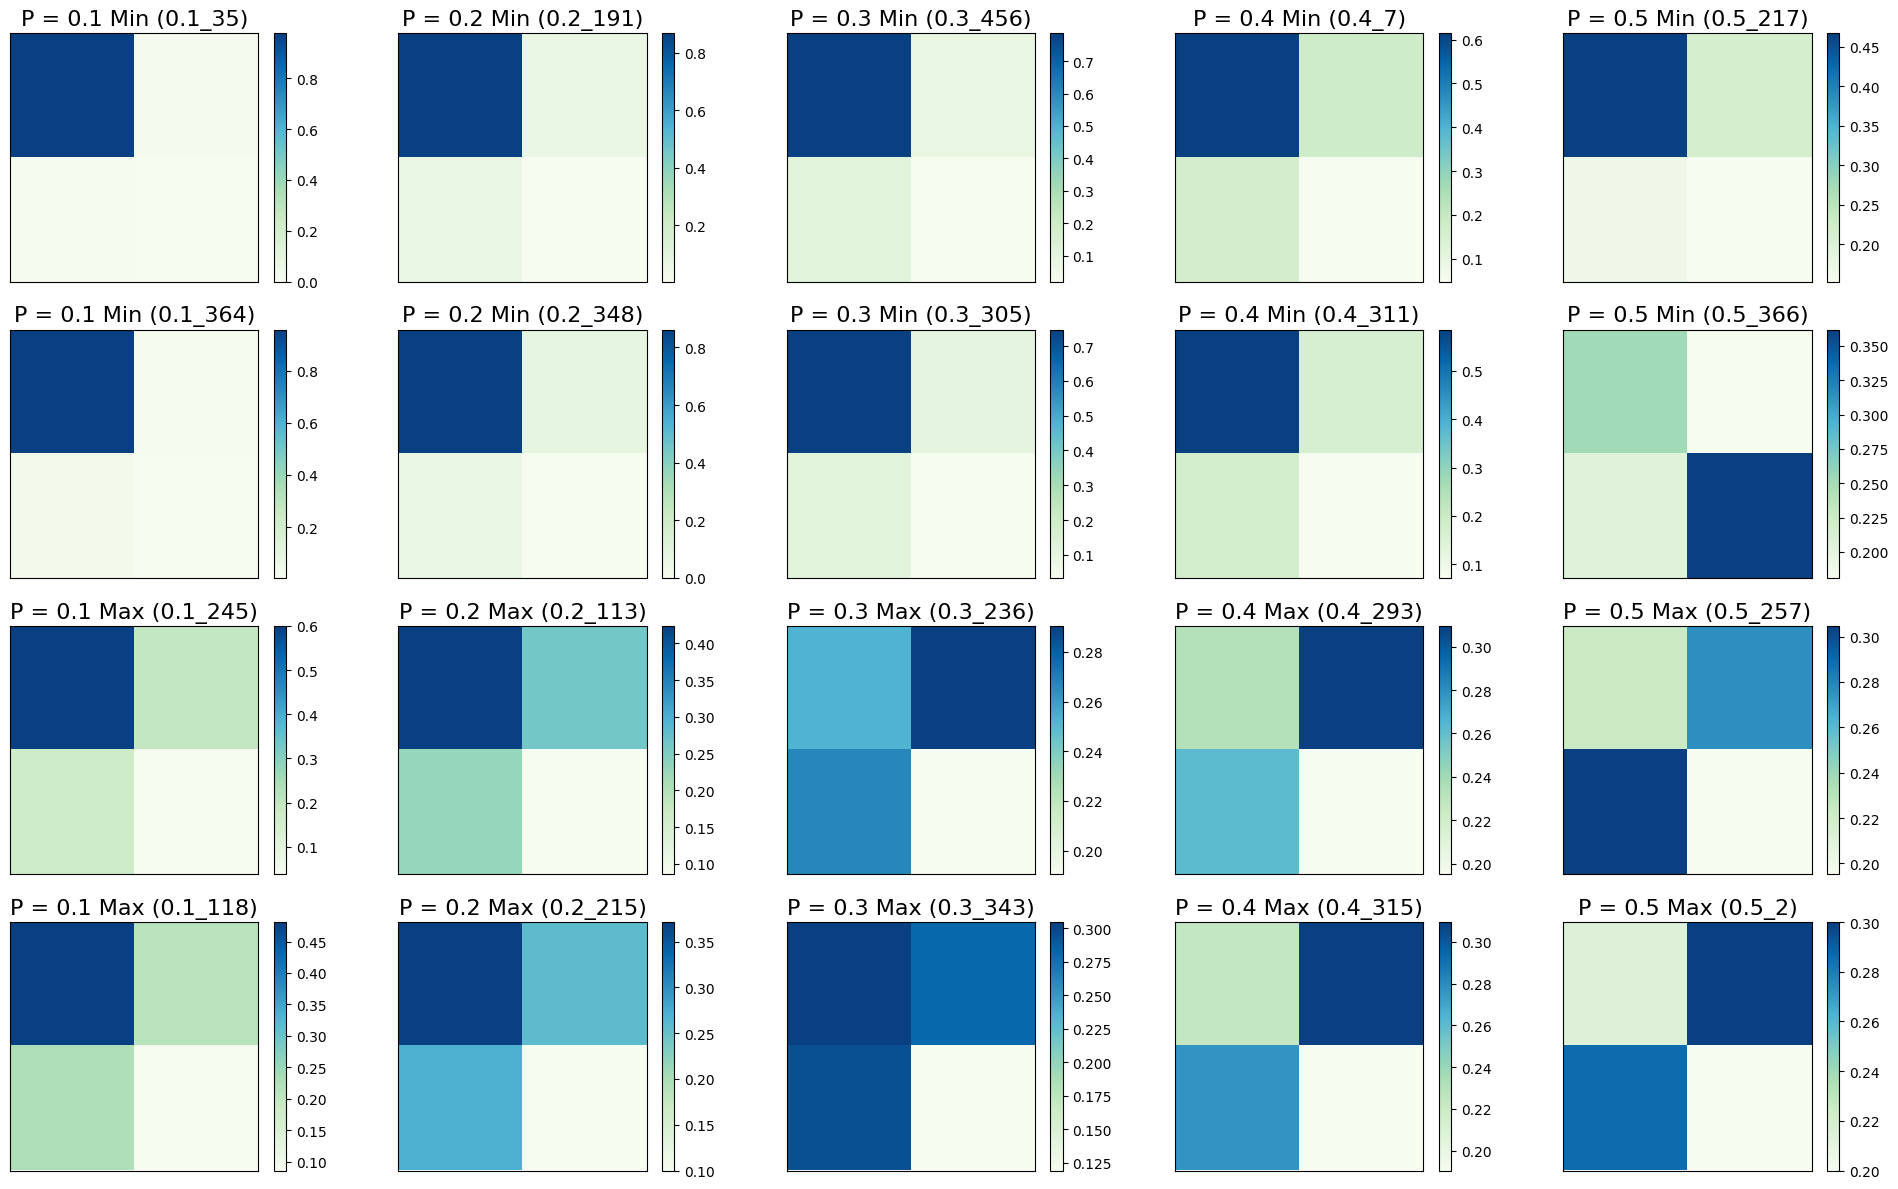

In [742]:
contrast_keys = [
    '0.1_35', '0.2_191', '0.3_456', '0.4_7', '0.5_217',   
    '0.1_364', '0.2_348', '0.3_305', '0.4_311', '0.5_366', 
    '0.1_245',  '0.2_113', '0.3_236', '0.4_293', '0.5_257',
    '0.1_118',  '0.2_215', '0.3_343', '0.4_315', '0.5_2'    
]

contrast_titles = [
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max'
]

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = contrast_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'P = {contrast_titles[i]} ({contrast_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

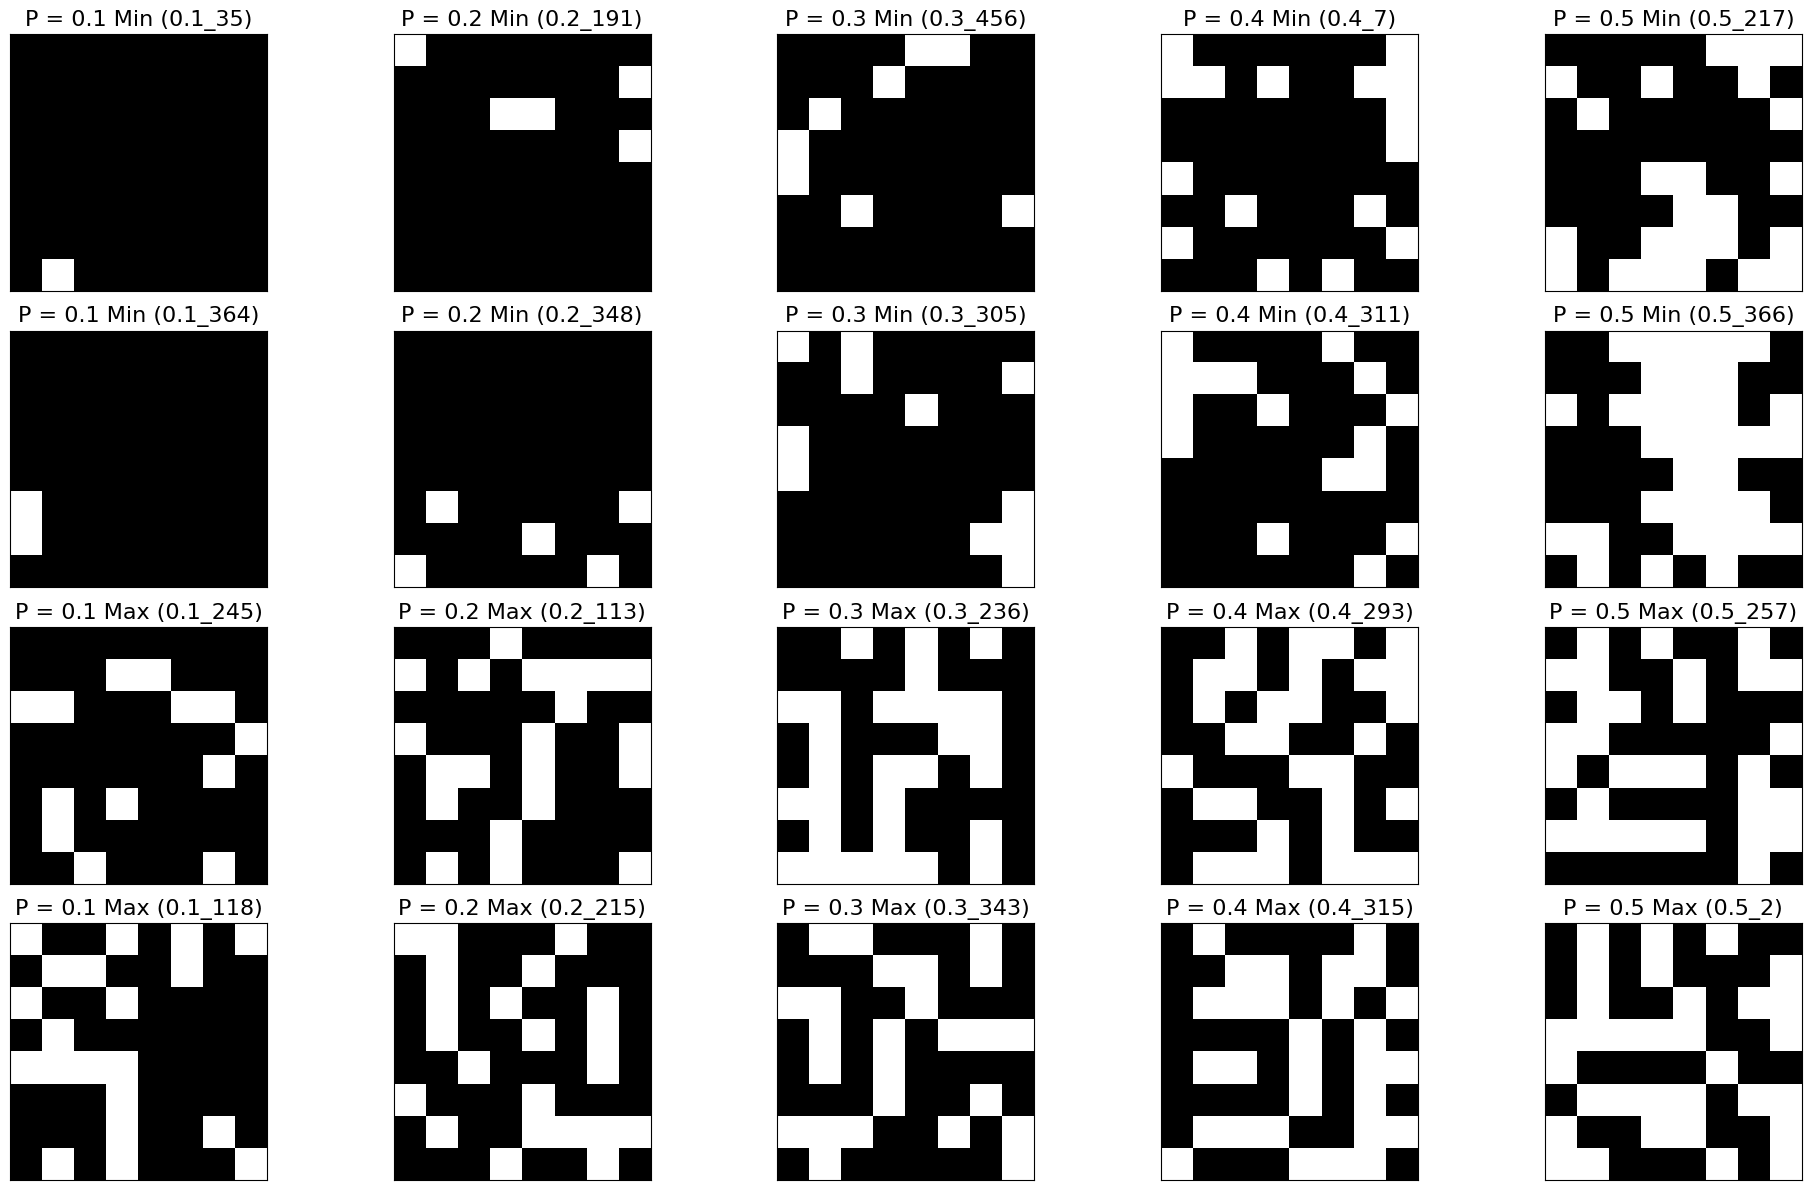

In [743]:
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = contrast_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'P = {contrast_titles[i]} ({contrast_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

## Correlation

$$ \frac{\sum^{N_g}_{i=1}\sum^{N_g}_{j=1}{p(i,j)ij-\mu_x\mu_y}}{\sigma_x(i)\sigma_y(j)} $$
Also written as:
$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \left( \frac{i - \mu_x}{\sigma_x} \right) \left( \frac{j - \mu_y}{\sigma_y} \right) p(i, j) $$

This is similar to a discrete implementation of the Pearson correlation coefficient for the joint probability mass function $p(i, j)$. It measures how much the gray level of a pixel is linearly predictable from its neighbor.

Entries where both $i$ and $j$ are simultaneously or singly greater than or less than the mean are positive (thus greater value). These represent "consistent" regions (dark-dark or bright-bright). Entries where one pixel is bright and the other is dark relative to the mean are; these represent "transitional" or "inconsistent" regions.

Since the terms are standardized by $\sigma_x$ and $\sigma_y$, this feature is bounded (with trespect to the GLCM).

Only noticable differance between the settings was: the 0.1 and 0.9 bernoulli setting were likely to have a higher variance, further examinations are needed. Nevertheless, this difference in mere varianvce of samples dosen't provide much insight unto the feature characteristics. Values range from -0.1 to 0.1, and average around -0.012 (all settings)

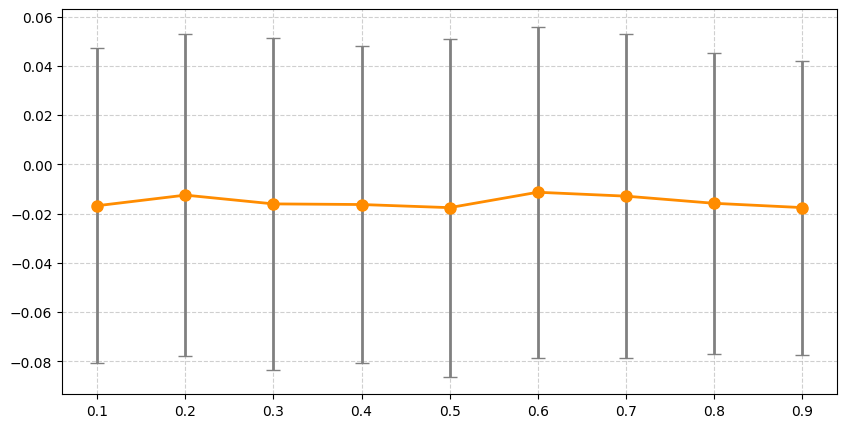

In [404]:
avg_correlation = [np.mean([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_correlation = [np.std([features[3] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_correlation, yerr=std_correlation, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Lets take a look at the sample images. 

Here we look at images with low correlation across the random settings, in attempt to find similarities in the images.

In [437]:
df.groupby('p')['correlation'].idxmin()

p
0.1    0.1_372
0.2    0.2_307
0.3    0.3_107
0.4    0.4_315
0.5      0.5_2
0.6    0.6_458
0.7     0.7_55
0.8     0.8_81
0.9    0.9_216
Name: correlation, dtype: object

In [574]:
df['glcm']['0.5_2']

array([[0.21428571, 0.3       ],
       [0.28571429, 0.2       ]])

In [573]:
df['glcm']['0.4_315']

array([[0.22380952, 0.30952381],
       [0.27619048, 0.19047619]])

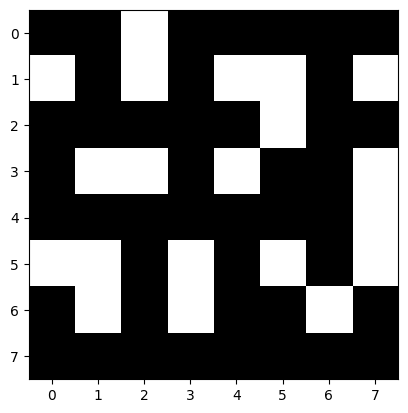

In [440]:
plt.imshow(df['image']['0.3_107'], cmap='gray')

In [572]:
df['glcm']['0.3_107']

array([[0.4047619 , 0.26190476],
       [0.26666667, 0.06666667]])

In [571]:
df['glcm']['0.2_307']

array([[0.54761905, 0.2047619 ],
       [0.21904762, 0.02857143]])

In [570]:
df['glcm']['0.1_372']

array([[0.74761905, 0.12380952],
       [0.12857143, 0.        ]])

Now for samples with the highest correlation values.

In [443]:
df.groupby('p')['correlation'].idxmax()

p
0.1     0.1_70
0.2    0.2_296
0.3    0.3_434
0.4    0.4_261
0.5      0.5_5
0.6     0.6_59
0.7    0.7_193
0.8    0.8_499
0.9    0.9_150
Name: correlation, dtype: object

Now samples with average values.

In [486]:
df.groupby('p')['correlation'].mean()

p
0.1   -0.016768
0.2   -0.012474
0.3   -0.016039
0.4   -0.016292
0.5   -0.017563
0.6   -0.011308
0.7   -0.012885
0.8   -0.015791
0.9   -0.017534
Name: correlation, dtype: float64

In [500]:
df[(df['correlation'] > -0.0175) & (df['correlation'] < -0.017) & (df['p'] == 0.5)][['correlation']]

,correlation
0.5_86,-0.017266
0.5_127,-0.017139
0.5_212,-0.017047
0.5_340,-0.017326


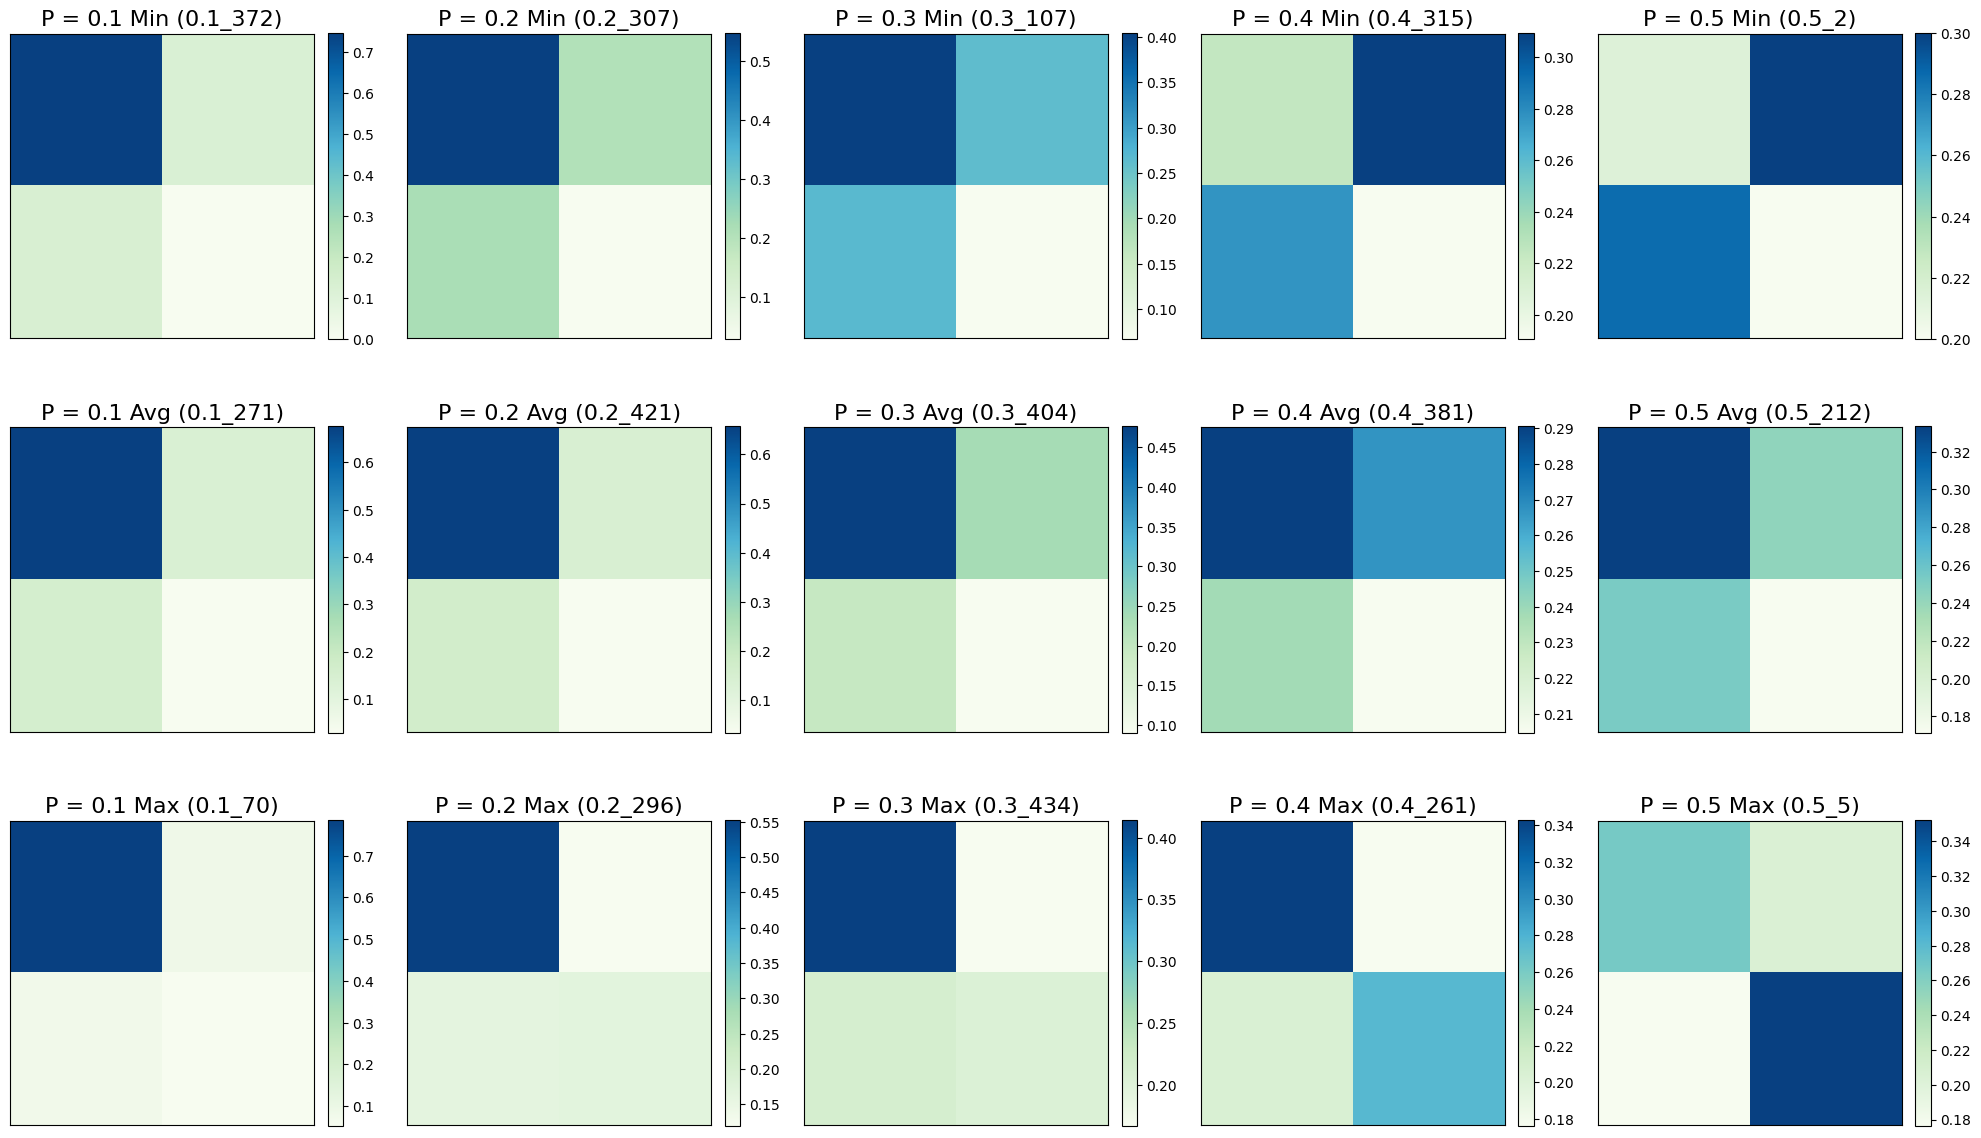

In [747]:
correlation_keys = [
    '0.1_372', '0.2_307', '0.3_107', '0.4_315', '0.5_2',   
    '0.1_271', '0.2_421', '0.3_404', '0.4_381', '0.5_212', 
    '0.1_70',  '0.2_296', '0.3_434', '0.4_261', '0.5_5'    
]

correlation_titles = [
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Avg', '0.2 Avg', '0.3 Avg', '0.4 Avg', '0.5 Avg',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max'
]

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = correlation_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'P = {correlation_titles[i]} ({correlation_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

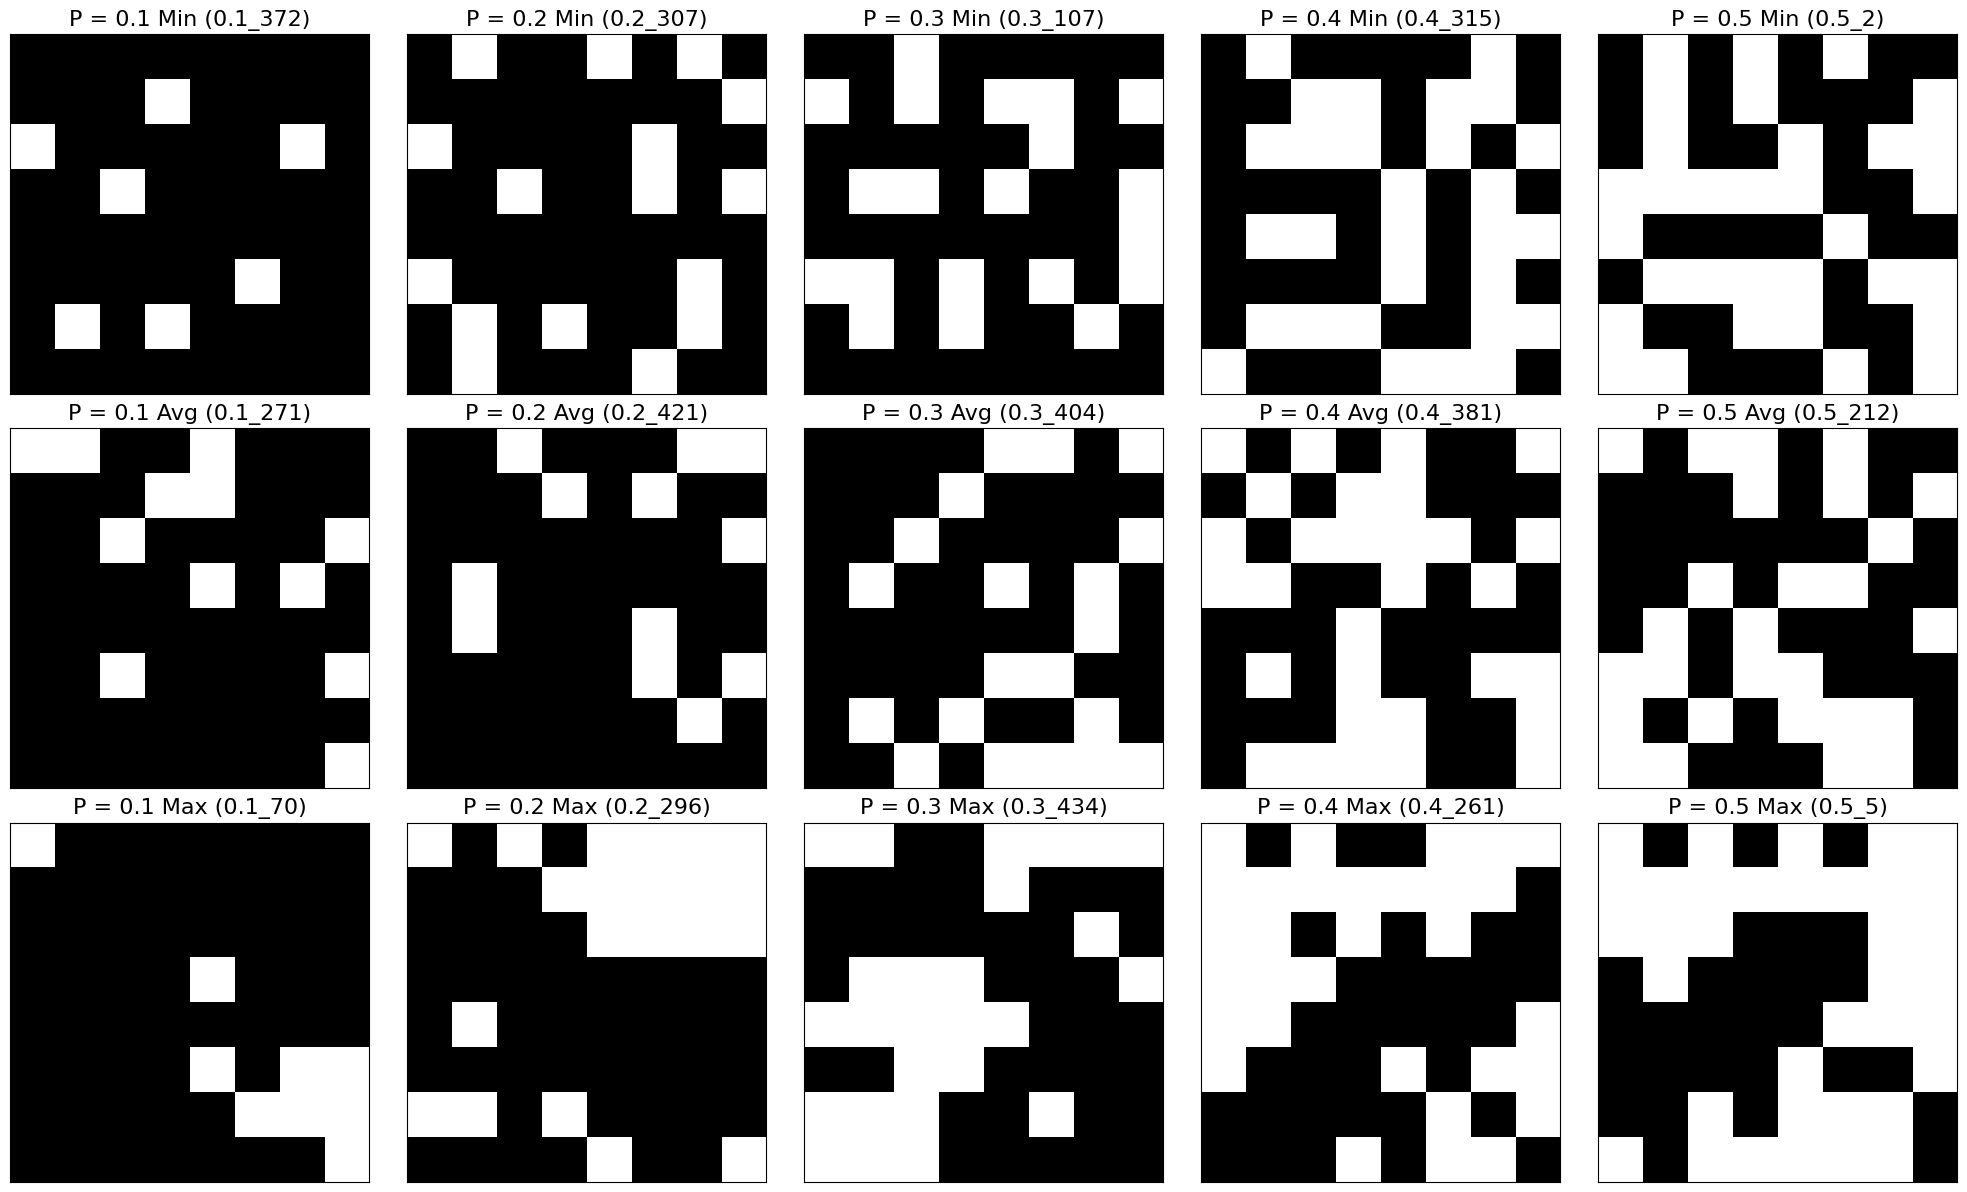

In [741]:
fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(15):
    ax = axes[i]
    key = correlation_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'P = {correlation_titles[i]} ({correlation_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

From the samples, one can observe that images with higher corraltation values showed patterns of pixels of the same colors neaighboring each other or the GLCM is diagonal-dominant. In an image this can indicate wether the gray levels are scattered or clustered. When looking at images with more noise (0.4 and 0.5), samples with lower correlation values were more concentrated at the off-diagonals. 

With respect to the gray levels, correlation measures the ration between the frequency of co-occurences with the same gray level (correlation within each gray level) and the frequency of co-occurences with differeing gray levels.

This feature may pick up signals in images if the glcm is computed with $d > 1$.

## Difference entropy

$$ \displaystyle\sum^{N_g-1}_{k=0}{p_{x-y}(k)\log_2\big(p_{x-y}(k)+\epsilon\big)} $$
Also written as:
$$ -\sum_{k=0}^{N-1} p_{x-y}(k) \log p_{x-y}(k) $$

This feature uses a marginalization of the GLCM along its off-diagonals. It measures the uniformity of the distribution of differences. If the probability mass is concentrated on just a few values of $k$, the entropy is low. If the mass is distributed across all possible differences, entropy is maximized.

Shannon Entropy applied to the distribution of gray-level differences $(p_{x-y}(k))$. Simply Difference Entropy quantifies the complexity and disorder of the local intensity changes rather than the intensity of the changes themselves.

At a high difference entropy value the image contains a vast variety of local transitions (some subtle, some sharp) with no dominant pattern. There is high uncertainty in predicting the difference between a pixel and its neighbor.
At a low difference entropy value the image has order or "structural simplicity". The distribution of differences is sparse.


* Difference Entropy is a measure of the randomness/variability in neighborhood intensity value differences (pyradiomics).

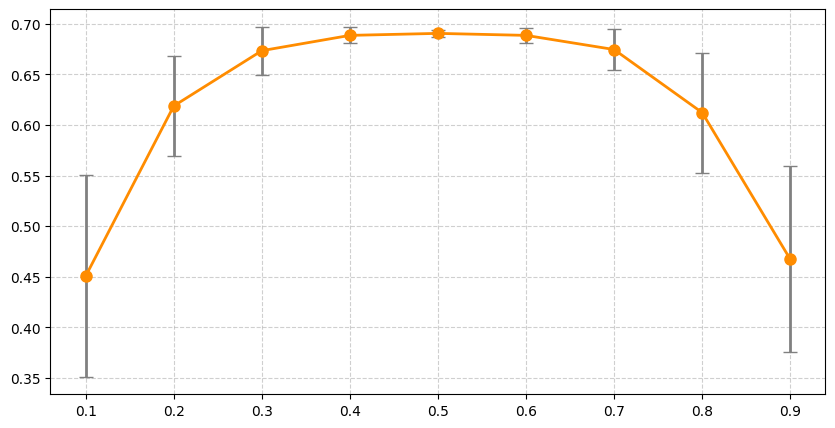

In [405]:
avg_difference_entropy = [np.mean([features[9] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_difference_entropy = [np.std([features[9] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_difference_entropy, yerr=std_difference_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

Plotted are 2 samples with lowest difference entropy values and 2 samples with the highest, for each random setting (0.1-0.5).

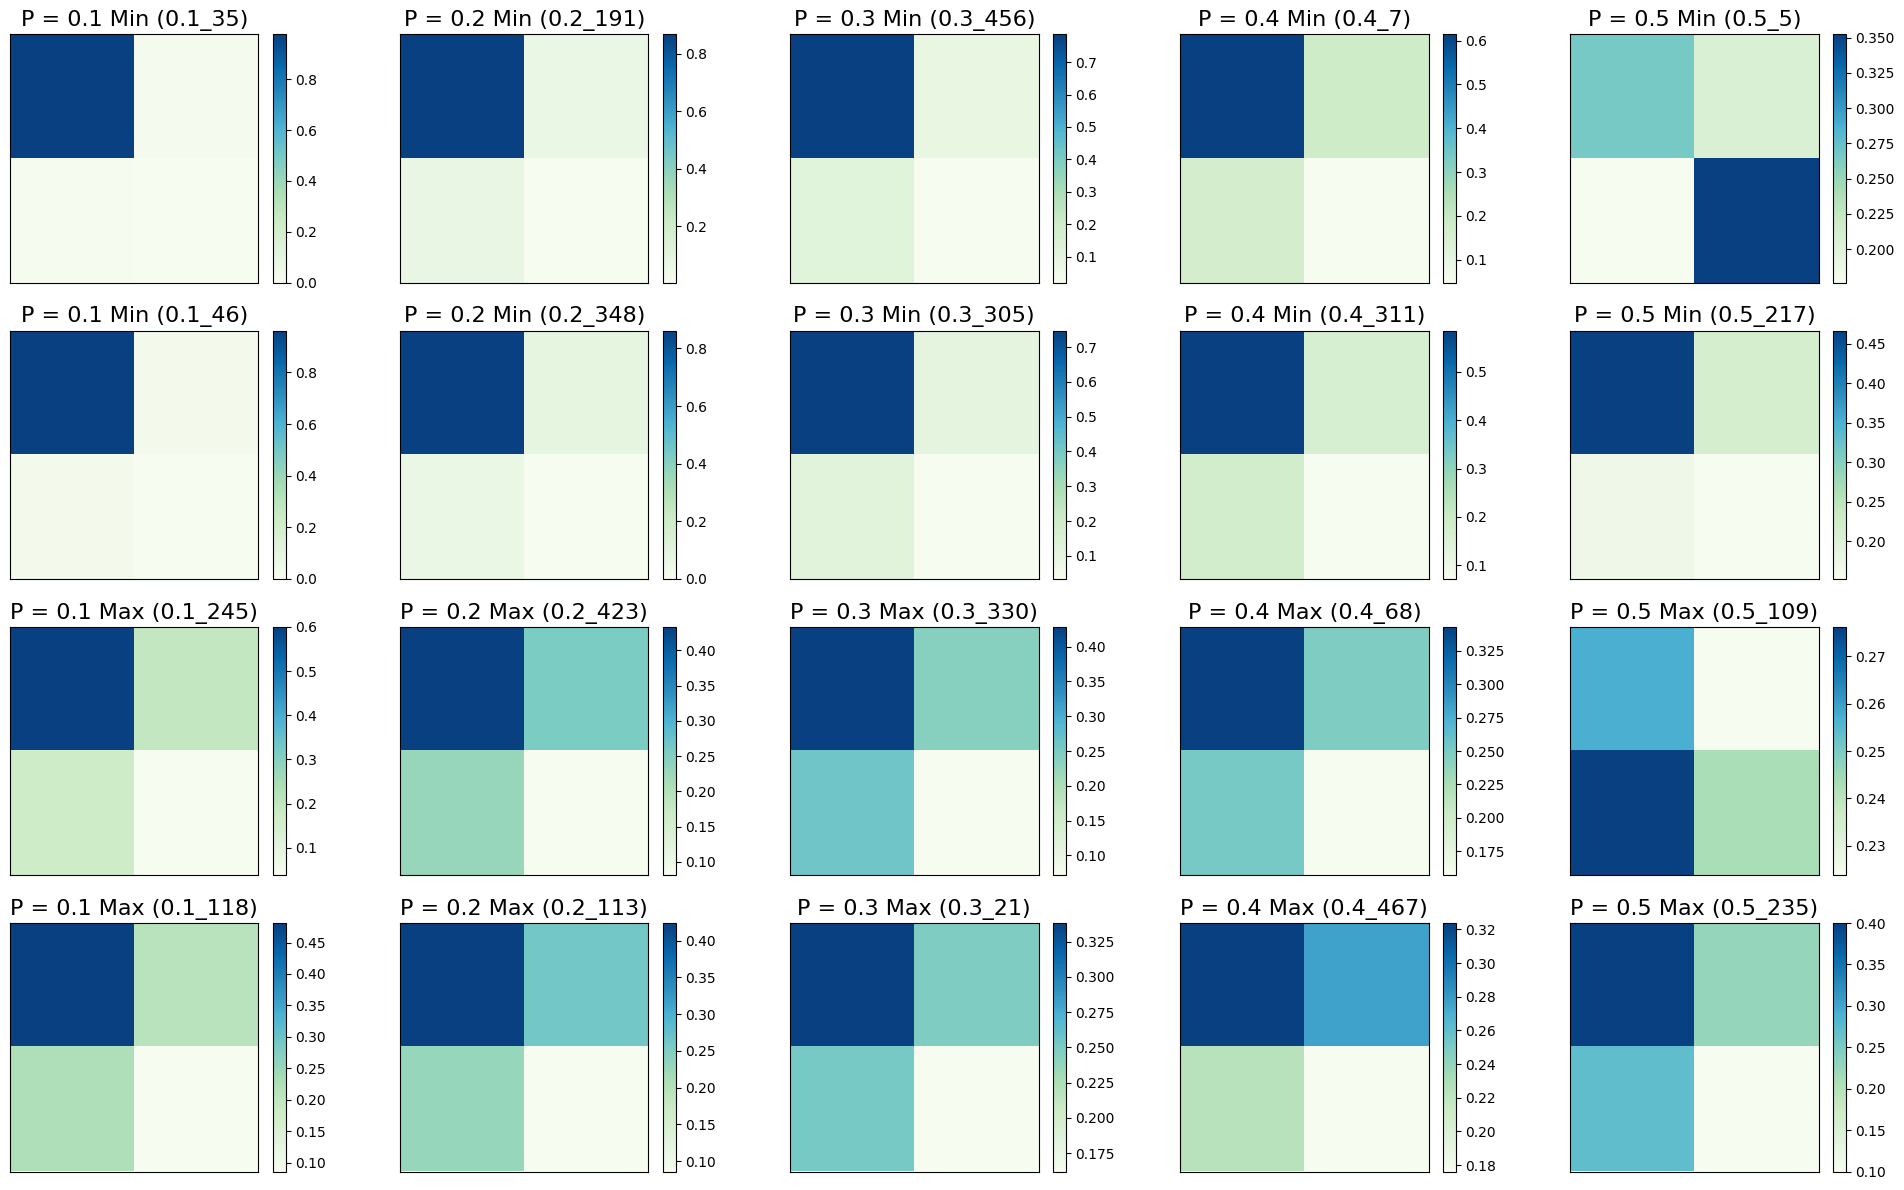

In [739]:
diffentropy_keys = [
    '0.1_35', '0.2_191', '0.3_456', '0.4_7', '0.5_5',   
    '0.1_46', '0.2_348', '0.3_305', '0.4_311', '0.5_217', 
    '0.1_245',  '0.2_423', '0.3_330', '0.4_68', '0.5_109',
    '0.1_118',  '0.2_113', '0.3_21', '0.4_467', '0.5_235'    
]

diffentropy_titles = [
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Min', '0.2 Min', '0.3 Min', '0.4 Min', '0.5 Min',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max',
    '0.1 Max', '0.2 Max', '0.3 Max', '0.4 Max', '0.5 Max'
]

fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = diffentropy_keys[i]
    
    im = ax.imshow(df['glcm'][key], cmap='GnBu')
    ax.set_title(f'P = {diffentropy_titles[i]} ({diffentropy_keys[i]})', fontsize=16)
    plt.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

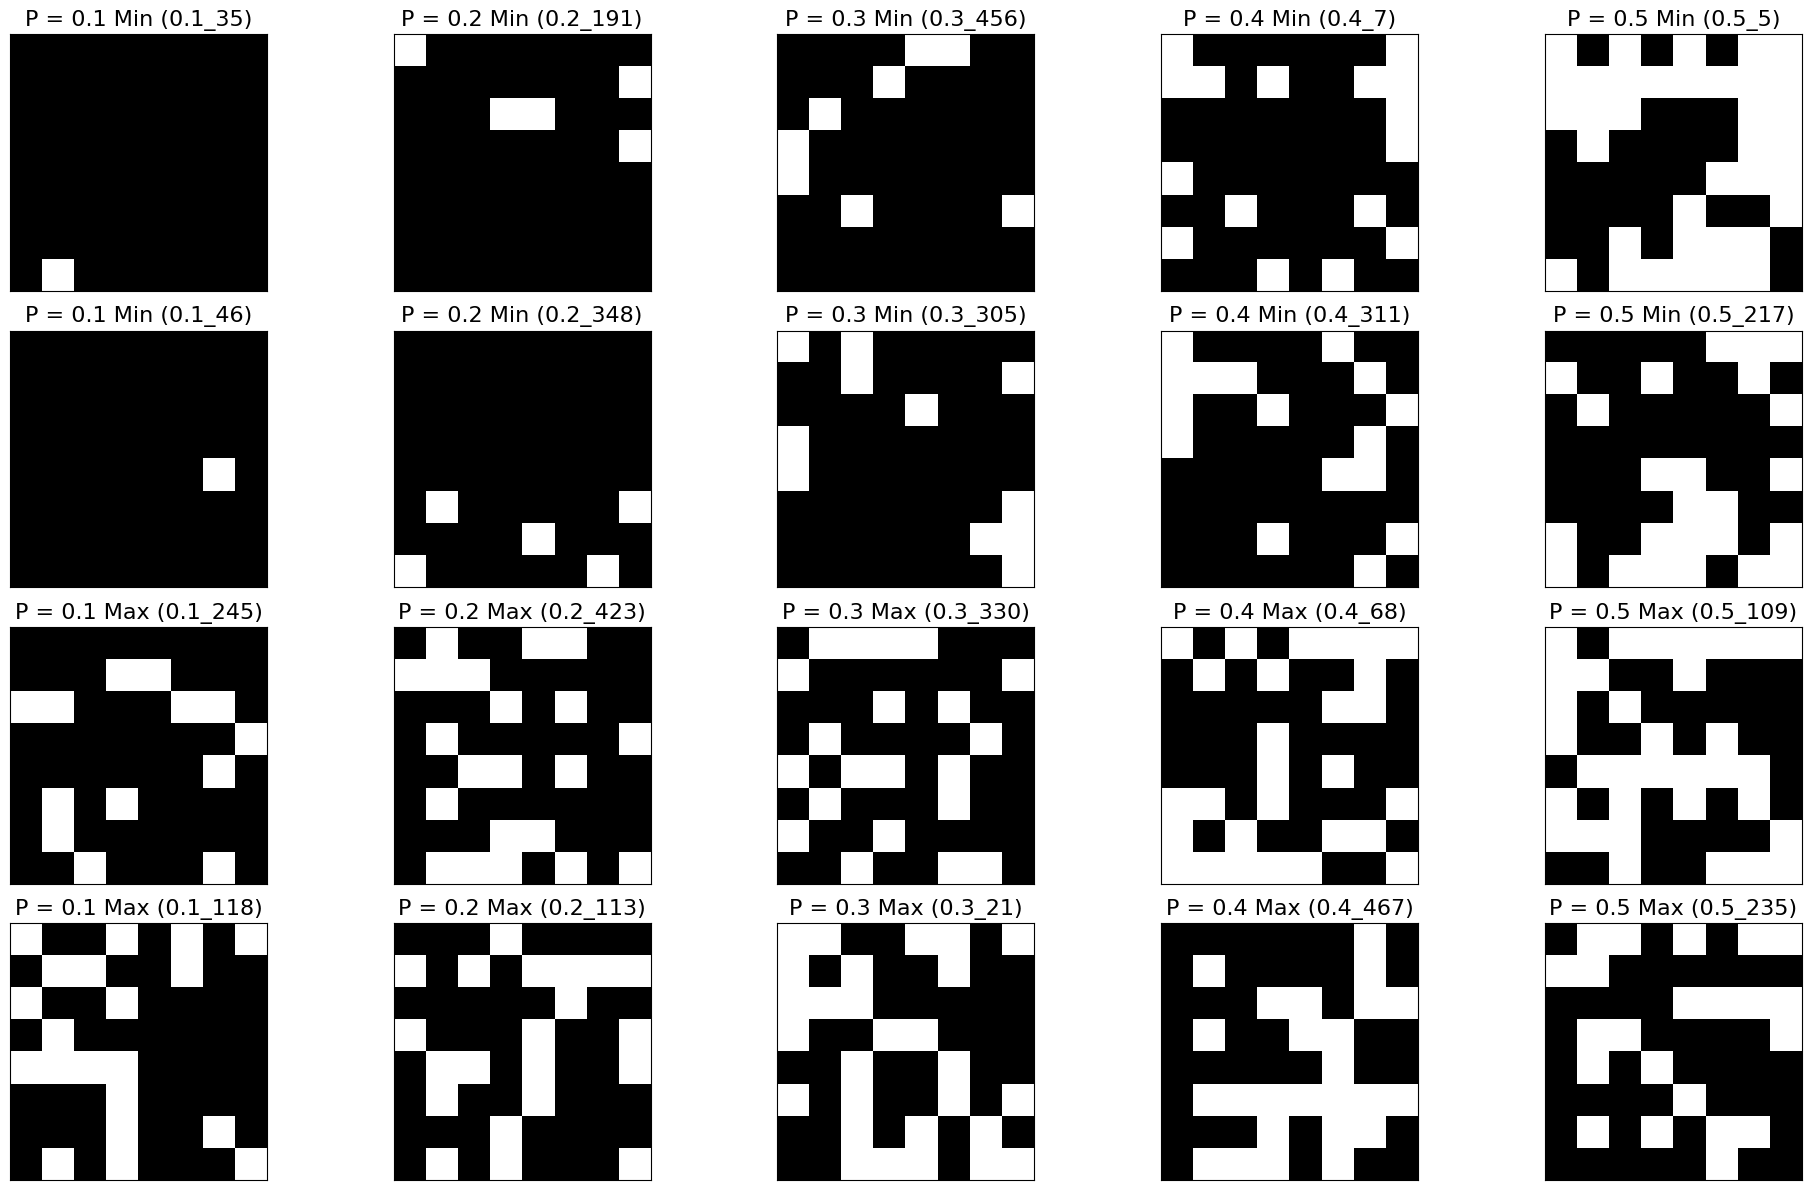

In [740]:
fig, axes = plt.subplots(4, 5, figsize=(20, 12))
axes = axes.flatten() 

for i in range(20):
    ax = axes[i]
    key = diffentropy_keys[i]
    
    im = ax.imshow(df['image'][key], cmap='gray')
    ax.set_title(f'P = {diffentropy_titles[i]} ({diffentropy_keys[i]})', fontsize=16)
    
    ax.set_xticks([])
    ax.set_yticks([])

plt.tight_layout()
plt.show()

It seems like this feature is lower in images where a gray level is dominant. As previously stated, the more types of co-occurences in the glcm (variety of gray levels in the image) will increase the feature value. The high value in the 0.1 random variable setting (see sample 0.1_118) can be justified for its (unlikely) generation of more white pixels.

## Difference variance

$$ \sum_{k=0}^{N-1} (k - \mu_{x-y})^2 p_{x-y}(k) $$

this feature measures the variance of the marginalized difference distribution $(p_{x-y}(k))$. The term $(k - \mu_{x-y})^2$ acts as a weighting function that penalizes deviations from the mean difference $\mu_{x-y}$. If an image has a very consistent texture where the intensity change between neighbors is stable, $p_{x-y}(k)$ will be highly concentrated around its mean, resulting in a low variance.

Low difference variance suggests a "predictable" texture. Even if the image is high-contrast, if the transitions between light and dark pixels follow a regular, repetitive rule, the variance of those differences remains small.

High difference variance suggests a complex texture where the relationships between adjacent pixels are not uniform. It captures the degree of disorder.

* Difference Variance is a measure of heterogeneity that places higher weights on differing intensity level pairs that deviate more from the mean (pyradiomics).

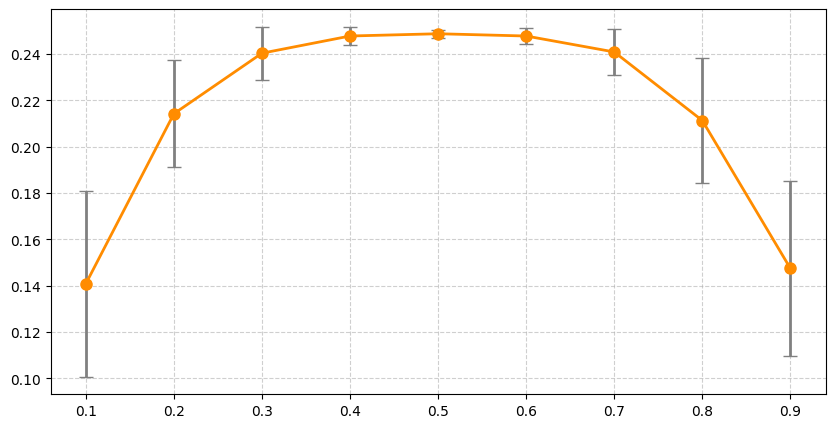

In [406]:
avg_difference_variance = [np.mean([features[10] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_difference_variance = [np.std([features[10] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_difference_variance, yerr=std_difference_variance, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Dissimilarity

$$ \displaystyle\sum^{N_g}_{i=1}\displaystyle\sum^{N_g}_{j=1}{|i-j|p(i,j)} $$

Dissimilarity is a measure of the "mass" of the GLCM relative to its main diagonal. It represents the expected value of the $L_1$ distance between the intensities of pixel pairs $(i, j)$. the term $|i-j|$ acts as a distance function; wherever $i=j$ (the diagonals, where there is no change in gray levels) the entry is nullified. As co-occurences become more frequient across higher differences in gray levels, the mass spreads away from the diagonal.

Contrast $(\sum (i-j)^2 p(i,j))$ uses a quadratic penalty that heavily weights larger intensity gaps; Dissimilarity uses a linear weighting $|i-j|$.

* mathematically equal to Difference Average (pyradiomics)

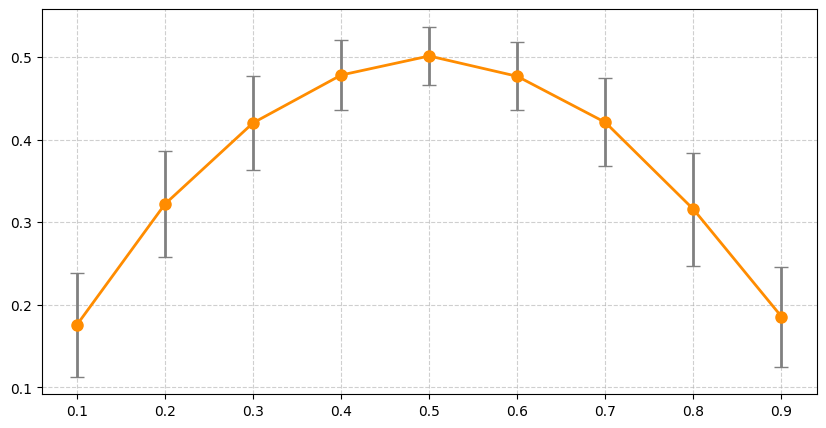

In [407]:
avg_dissimilarity = [np.mean([features[7] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_dissimilarity = [np.std([features[7] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_dissimilarity, yerr=std_dissimilarity, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Energy

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} p(i, j)^2 $$
Aslo known as Angular Second Moment. 

Energy is a measure of the concentration of the probability distribution within the GLCM. This feature operates on the principle that the sum of squares of a set of probabilities is maximized when the "probability mass" is concentrated in a few entries and minimized when it is spread uniformly. If an image is dominated by a certain co-occurnce, wether $i=j$ (a singulare gray level) or $i \neq j$ (a singular gradient), the normalized GLCM at entry $(i,j)$ will in turn have a large probability. This concentration (energy) at a singular entry causes the feature to increase; concentrations at multiple entries can produce a high feature value as long as it's probabilities are much larger than the rest.

* Energy is a measure of homogeneous patterns in the image. A greater Energy implies that there are more instances of intensity value pairs in the image that neighbor each other at higher frequencies (pyradiomics).
* The energy is a measure of homogeneity of the image. If the image is homogeneous, the image
contains only a few gray levels. This results in a GLCM with only a few, but relatively high values
of $p(i,j)$. The sum of squares will then be high (Parmer et al.).

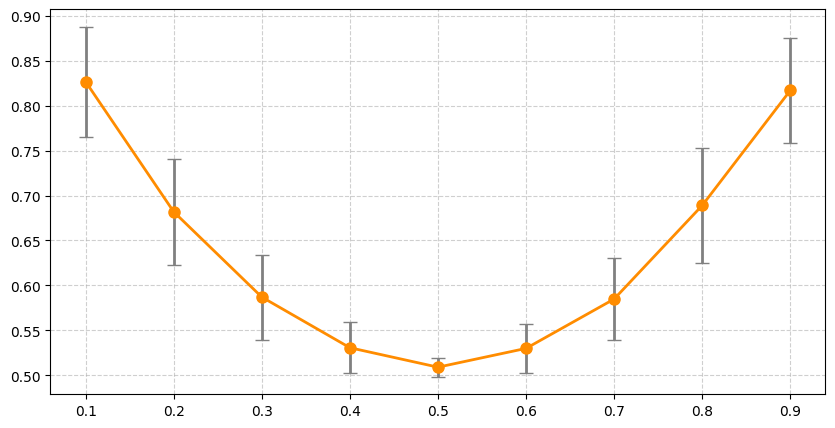

In [408]:
avg_energy = [np.mean([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_energy = [np.std([features[1] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_energy, yerr=std_energy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Entropy

$$ -\sum_{i=1}^{N} \sum_{j=1}^{N} p(i, j) \log p(i, j) $$
or,
$$ -\displaystyle\sum^{N_g}_{i=1}\displaystyle\sum^{N_g}_{j=1} {p(i,j)\log_2\big(p(i,j)+\epsilon\big)} $$

Shannon entropy applied to the normalized glcm. Entropy is maximized when the distribution is uniform ($p(i, j) = 1/N^2$ for all $i, j$), meaning every possible gray-level transition occurs with equal frequency. Entropy is minimized when the image is perfectly homogeneous, and only one entry in the GLCM has a probability of $1$.

In the context of a GLCM, entropy quantifies the structural unpredictability of gray level co-occurrences. A low entropy GLCM indicates that only a few gray level pairs occur with significant probability (typical of highly regular textures, large uniform regions, or consistent gradients). A high entropy GLCM reflects a broad spread of co-occurrence probabilities, corresponding to complex, irregular, or noisy textures.

Entropy is agnostic to where the mass lies in the matrix (diagonal vs. off-diagonal). This feature can play as a compliment of Energy and Homeginiety-like features feature.

* [Joint] entropy is a measure of the randomness/variability in neighborhood intensity values (pyradiomics).
* Inhomogeneous Images have low entropy, while a homogeneous scene has high entropy (Parmer et al.).

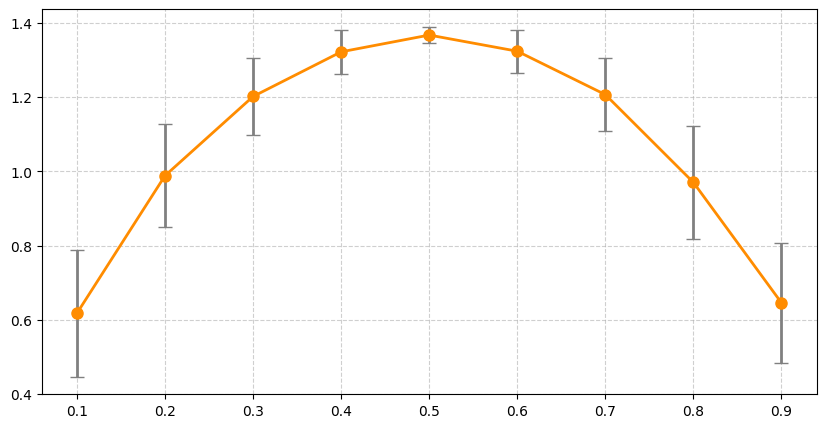

In [409]:
avg_entropy = [np.mean([features[8] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_entropy = [np.std([features[8] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_entropy, yerr=std_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Homogeneity

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + (i - j)^2} $$

Homogeneity 2

This feature quantifies the degree of local similarity in an image. The denominator term $1 + (i - j)^2$, acts as a penalty that is minimized when $i = j$ (the diagonal entries). In a region where pixel co-occurences are nearly identical, $(i - j) \rightarrow 0$, the weights approach $1$. In a GLCM the diagonals and near diagonals will have the most contribution to the sum. As the gradients $(i - j)$ increase, the denominator grows quadratically which reduces the contribution of those entries to the total sum. 

* Mathematically equal to Inverse Difference Moment (pyradiomics)


Homogeniety 1: $$\sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + |i - j|} $$

Here the denominator grows linearly instead of quadratically.

* Mathematically equal to Inverse Difference (pyradiomics)

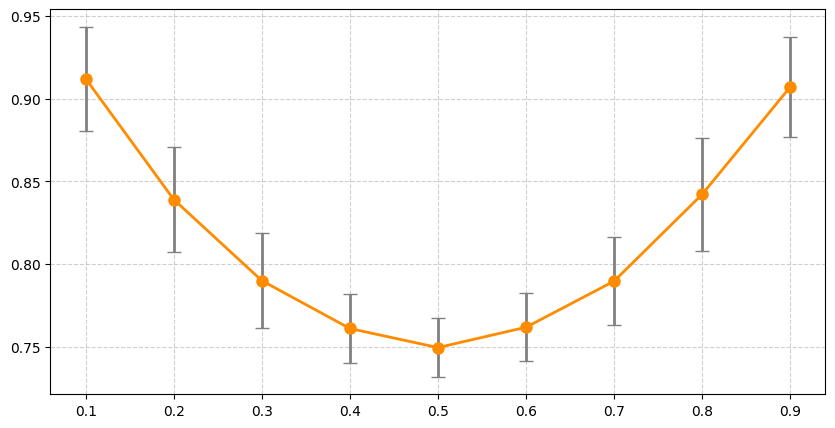

In [410]:
avg_homogeneity = [np.mean([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_homogeneity = [np.std([features[2] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_homogeneity, yerr=std_homogeneity, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Information measure of correlation 1

$$ \displaystyle\frac{HXY-HXY1}{\max\{HX,HY\}} $$



(pyradimocis)

IMC1 assesses the correlation between the probability distributions of $i$
and $j$
(quantifying the complexity of the texture), using mutual information $I(x,y)$:

\begin{align*}
I(i,j)
&= \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)\log_2\!\left(\frac{p(i,j)}{p_x(i)p_y(j)}\right) \\
&= \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)
\left(\log_2\!\big(p(i,j)\big) - \log_2\!\big(p_x(i)p_y(j)\big)\right) \\
&= \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)\log_2\!\big(p(i,j)\big)
- \sum_{i=1}^{N_g} \sum_{j=1}^{N_g} p(i,j)\log_2\!\big(p_x(i)p_y(j)\big) \\
&= -H_{XY} + H_{XY1}.
\end{align*}

However, in this formula, the numerator is defined as $H_{XY} - H_{XY1}$
(i.e.\ $-I(x,y)$),
and is therefore $\le 0$.
This reflects how this feature is defined in the original Haralick paper.

In the case where the distributions are independent, there is no mutual information
and the result will therefore be $0$.
In the case of uniform distribution with complete dependence, mutual information
will be equal to $\log_2(N_g)$.

Finally, $H_{XY} - H_{XY1}$
is divided by the maximum of the 2 marginal entropies, where in the latter case
of complete dependence (not necessarily uniform; low complexity) it will result
in $\mathrm{IMC1} = -1$,
as $H_X = H_Y = I(i,j)$.

In the case where both HX and HY are 0 (as is the case in a flat region), an arbitrary value of 0 is returned to prevent a division by 0. This is done on a per-angle basis (i.e. prior to any averaging)

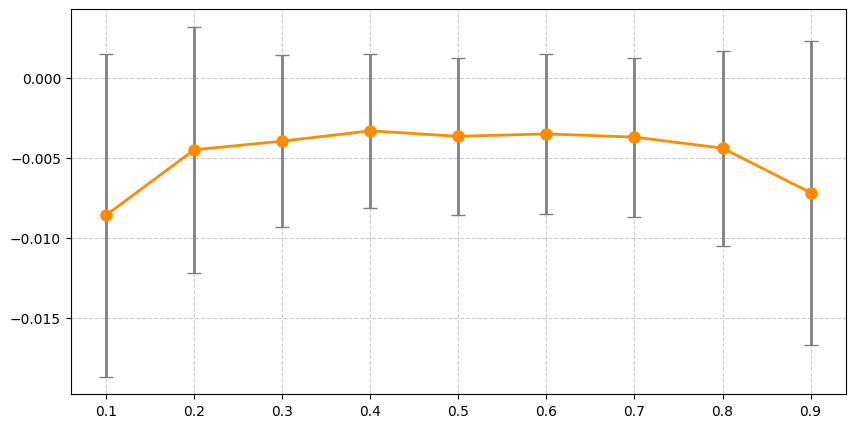

In [411]:
avg_imc1 = [np.mean([features[12] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_imc1 = [np.std([features[12] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_imc1, yerr=std_imc1, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Information measure of correlation 2

$$ \displaystyle\sqrt{1-e^{-2(HXY2-HXY)}} $$

(pyradiomics)

IMC2 also assesses the correlation between the probability distributions of $i$
and $j$
(quantifying the complexity of the texture).
Of interest is to note that $H_{XY1} = H_{XY2}$
and that $H_{XY2} - H_{XY} \ge 0$
represents the mutual information of the 2 distributions.
Therefore, the range of $\mathrm{IMC2} = [0,1)$,
with $0$ representing the case of 2 independent distributions
(no mutual information)
and the maximum value representing the case of 2 fully dependent
and uniform distributions
(maximal mutual information, equal to $\log_2(N_g)$).
In this latter case, the maximum value is then equal to
\[
1 - \sqrt{e^{-2\log_2(N_g)}},
\]
approaching $1$.

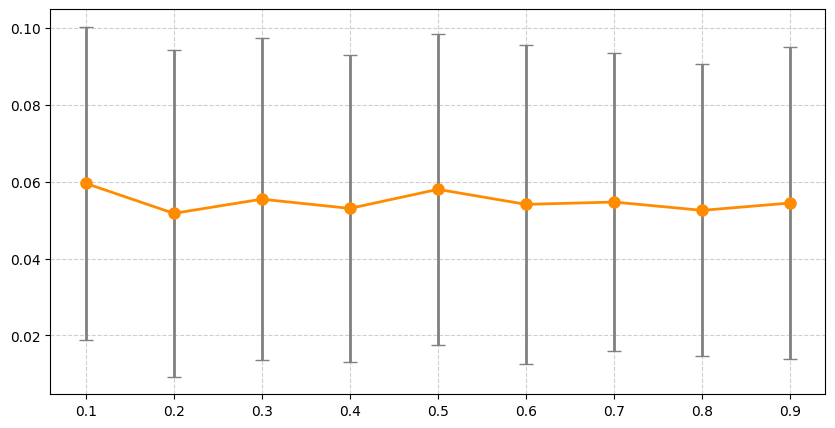

In [412]:
avg_imc2 = [np.mean([features[13] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_imc2 = [np.std([features[13] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_imc2, yerr=std_imc2, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Inverse difference

$$ \sum_{i=1}^{N} \sum_{j=1}^{N} \frac{p(i, j)}{1 + |i - j|} $$



* Inverse difference (a.k.a. Homogeneity 1) is another measure of the local homogeneity of an image. With more uniform gray levels, the denominator will remain low, resulting in a higher overall value. (pyradiomics)

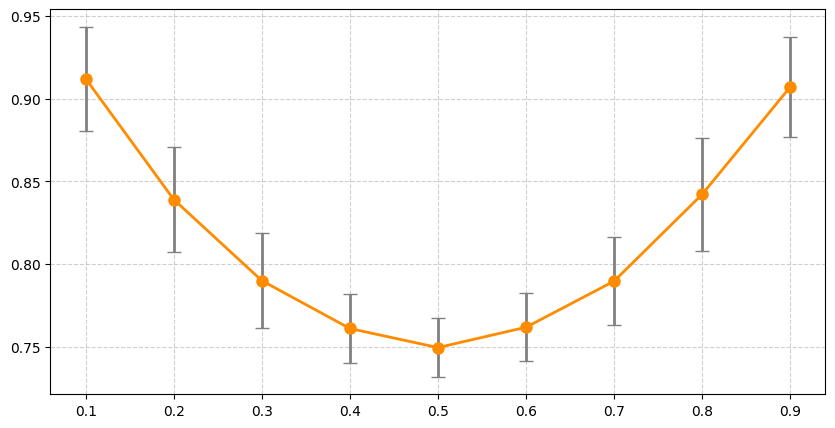

In [413]:
avg_inverse_difference = [np.mean([features[11] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_inverse_difference = [np.std([features[11] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_inverse_difference, yerr=std_inverse_difference, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Maximum probability

$$ \max\big(p(i,j)\big) $$

Also known as Joint Maximum
* Maximum Probability is occurrences of the most predominant pair of neighboring intensity values (pyradiomics).

## Sum average

$$ \displaystyle\sum^{2N}_{k=2}{k \cdot p_{x+y}(k)} $$

This gives us the sum of the indices weighted by the k value.

* Sum Average measures the relationship between occurrences of pairs with lower intensity values and occurrences of pairs with higher intensity values (pyradiomics).

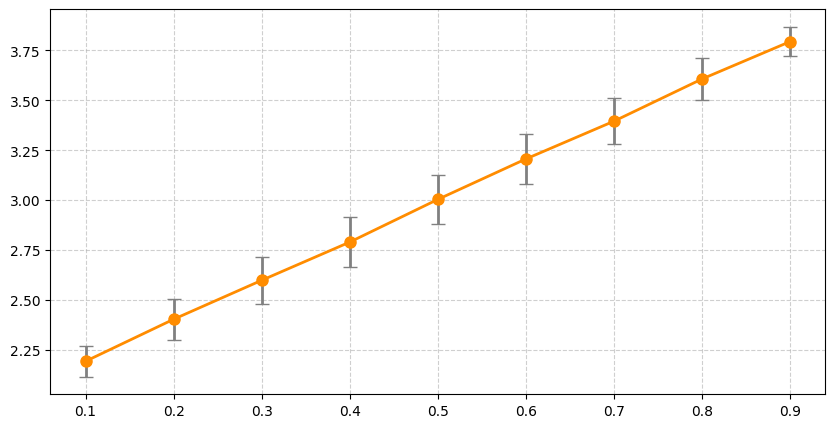

In [414]:
avg_sum_average = [np.mean([features[14] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_average = [np.std([features[14] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_average, yerr=std_sum_average, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sum entropy

$$ \displaystyle - \sum^{2N}_{k=2}{p_{x+y}(k)\log p_{x+y}(k)} $$
or,
$$ \displaystyle\sum^{2N}_{k=2}{p_{x+y}(k)\log_2\big(p_{x+y}(k)+\epsilon\big)} $$

* Sum Entropy is a sum of neighborhood intensity value differences (pyradiomics).

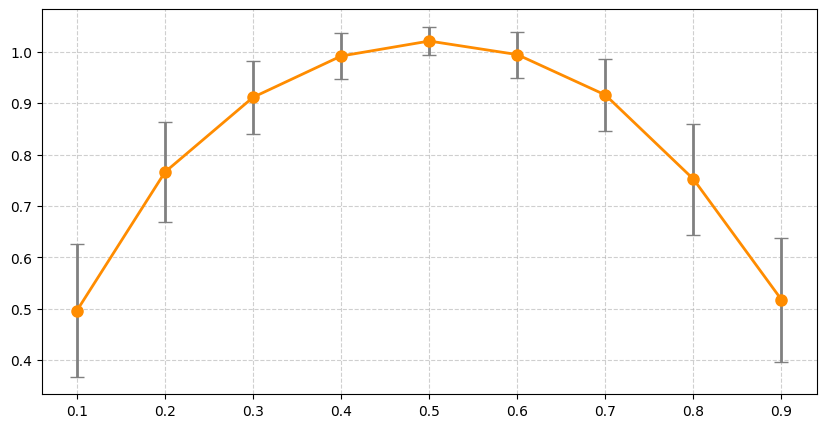

In [415]:
avg_sum_entropy = [np.mean([features[15] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_entropy = [np.std([features[15] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_entropy, yerr=std_sum_entropy, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sum of squares

$$ \displaystyle\sum^{N}_{i=1}\displaystyle\sum^{N}_{j=1}{(i-\mu)^2p(i,j)} $$
or,
$$ \displaystyle\sum^{N}_{i=1}\displaystyle\sum^{N}_{j=1}{(i-\mu_x)^2p(i,j)} $$

* Sum of Squares or Variance is a measure in the distribution of neighboring intensity level pairs about the mean intensity level in the GLCM (pyradiomics).

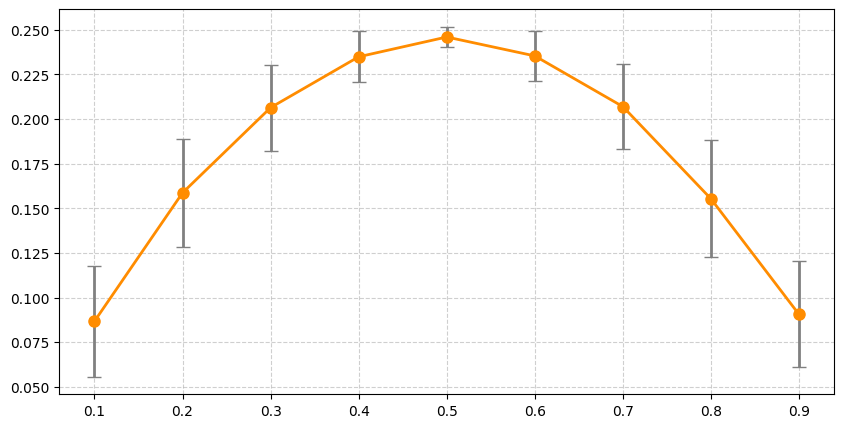

In [416]:
avg_sum_of_squares = [np.mean([features[16] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_of_squares = [np.std([features[16] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_of_squares, yerr=std_sum_of_squares, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Sum variance

$$  \displaystyle\sum^{2N}_{k=2}{(k-\mu_{x+y})^2p_{x+y}(k)} $$


Similar to the distribution of the contrast feature and dissimilarity feature. Maybe we can test to see if would produce a similar image when computed on a gray scale image.

* mathematically equal to Cluster Tendency (pyradiomics).

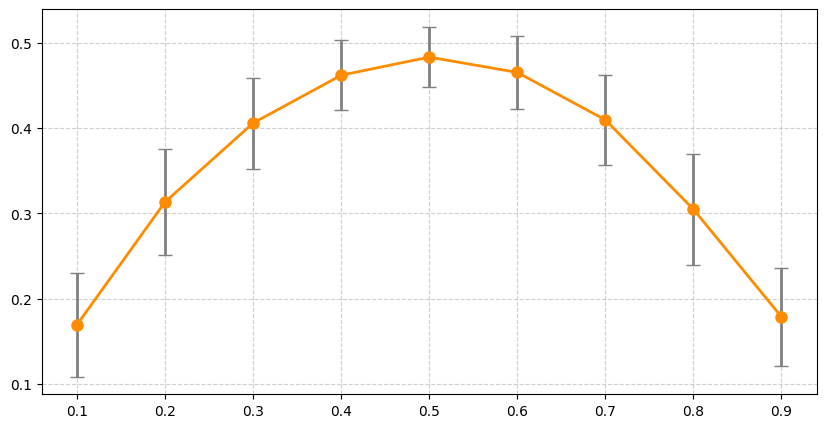

In [417]:
avg_sum_variance = [np.mean([features[17] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]
std_sum_variance = [np.std([features[17] for features in sample_features[p]]) for p in BERNOULLI_SETTINGS]

plt.figure(figsize=(10, 5))
plt.errorbar(BERNOULLI_SETTINGS, avg_sum_variance, yerr=std_sum_variance, fmt='-o', 
             capsize=5, color='darkorange', ecolor='gray', linewidth=2, markersize=8,
             label='Mean Contrast ($\pm$ 1 Std Dev)')

plt.grid(True, linestyle='--', alpha=0.6)
plt.show()

## Maximal Correlation Coefficient

$$ \sqrt{\text{second largest eigenvalue of Q}} $$
or,
$$ \sqrt{\lambda_2 Q(i,j)} $$

$$ Q(i, j) = \displaystyle\sum^{N}_{k=0}{\frac{p(i,k)p(j, k)}{p_x(i)p_y(k)}} $$

* The Maximal Correlation Coefficient is a measure of complexity of the texture. In case of a flat region, each GLCM matrix has shape (1, 1), resulting in just 1 eigenvalue. In this case, an arbitrary value of 1 is returned (pyradiomics).

## Difference average 

$$ \displaystyle\sum^{N_g-1}_{k=0}{kp_{x-y}(k)} $$

* Difference Average measures the relationship between occurrences of pairs with similar intensity values and occurrences of pairs with differing intensity values (pyradiomics).

In [418]:
# r"""
# **8. Difference Average**

# .. math::
#     \textit{difference average} = \displaystyle\sum^{N_g-1}_{k=0}{kp_{x-y}(k)}

# Difference Average measures the relationship between occurrences of pairs
# with similar intensity values and occurrences of pairs with differing intensity
# values.
# """

## Inverse variance

$$ \displaystyle\sum^{N_g-1}_{k=1}{\frac{p_{x-y}(k)}{k^2}} $$
or,
$$ \sum^{N_g}_{i=1} \sum^{N_g}_{j=1} {\frac{p(i,j)}{|i-j|^2}} \ , \ \ i \neq j  $$

Several other features are not listed here, can be found at (pyradiomics).

# Extras / Appendix

## Composit plot

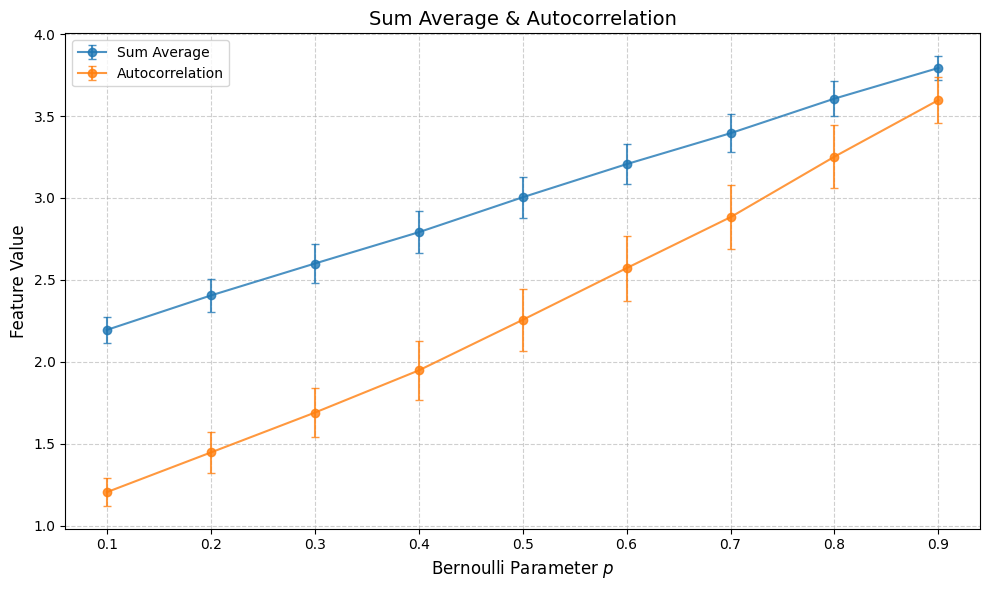

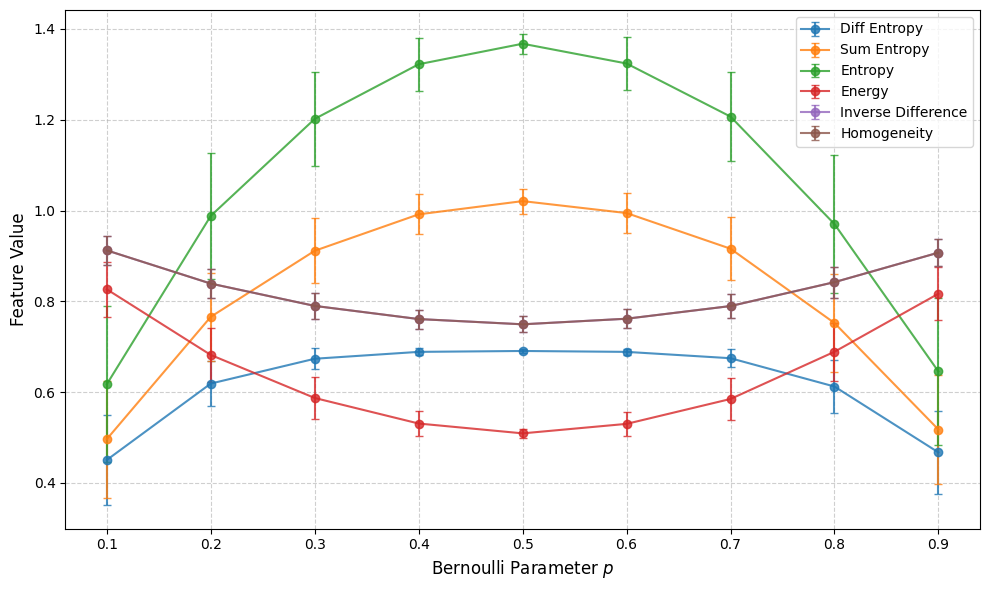

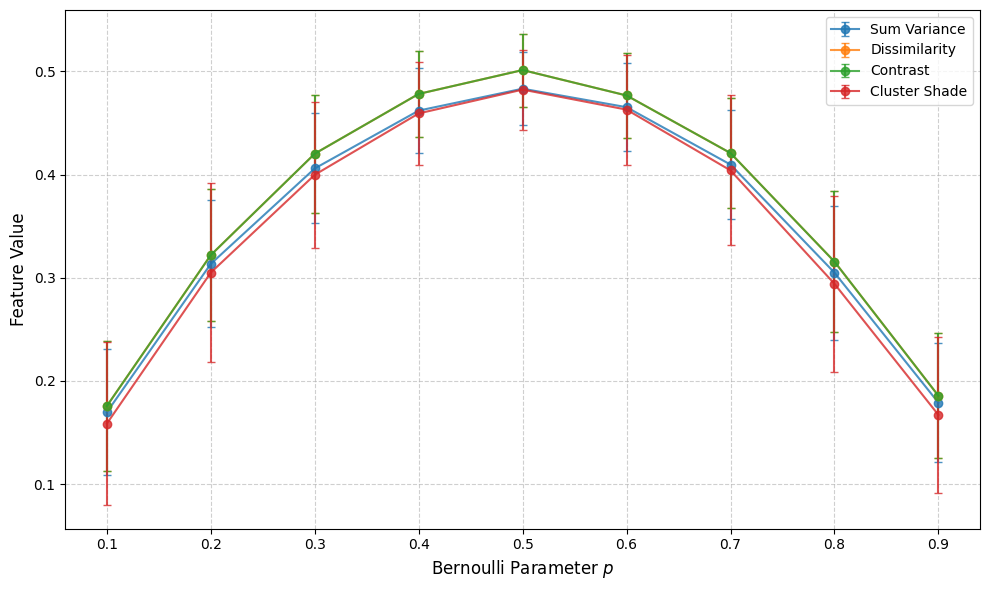

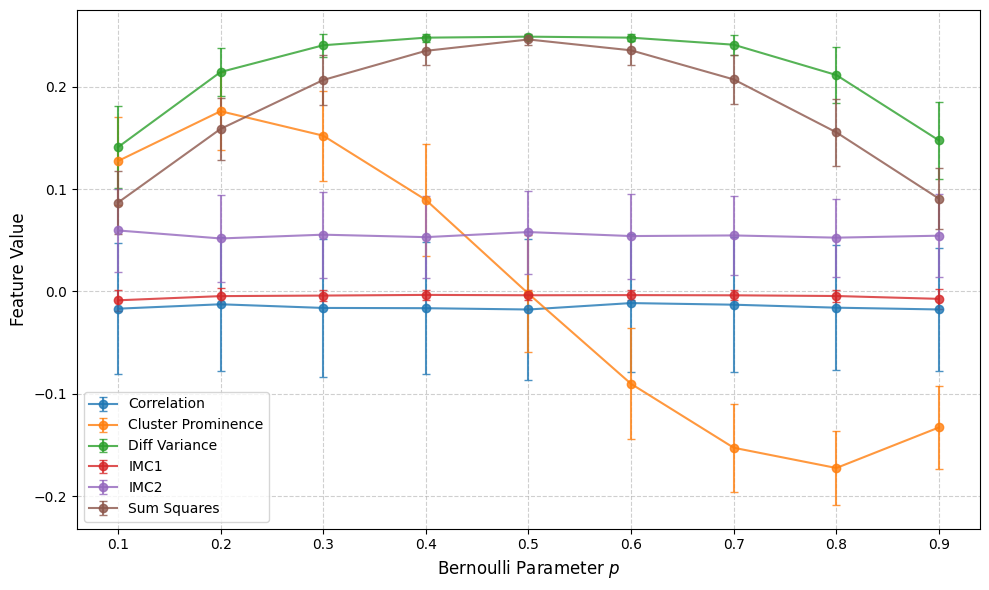

In [671]:
feature_names = [
    'Contrast', 'Energy', 'Homogeneity', 'Correlation', 
    'Autocorrelation', 'Cluster Prominence', 'Cluster Shade', 'Dissimilarity', 
    'Entropy', 'Diff Entropy', 'Diff Variance', 'Inverse Difference', 
    'IMC1', 'IMC2', 'Sum Average', 'Sum Entropy', 'Sum Squares', 'Sum Variance'
]

# Sum Average, Autocorrelation
group1_indices = [14, 4]  

# Diff Entropy, Sum Entropy, Entropy, Homogeneity, Inv Difference, Eenergy
group2_indices = [9, 15, 8, 1, 11, 2]

# Sum variance, Dissimilarity, Contrast, Cluster shade
group3_indices = [17, 7, 0, 6]

group4_indices = [i for i in range(18) if i not in group1_indices and i not in group2_indices and i not in group3_indices and i not in group4_indices]

def plot_group(indices, title):
    plt.figure(figsize=(10, 6))
    for i in indices:
        avg_feat = [np.mean([f[i] for f in sample_features[p]]) for p in BERNOULLI_SETTINGS]
        std_feat = [np.std([f[i] for f in sample_features[p]]) for p in BERNOULLI_SETTINGS]
        
        plt.errorbar(BERNOULLI_SETTINGS, avg_feat, yerr=std_feat, marker='o', 
                     label=feature_names[i], capsize=3, alpha=0.8)

    plt.title(title, fontsize=14)
    plt.xlabel('Bernoulli Parameter $p$', fontsize=12)
    plt.ylabel('Feature Value', fontsize=12)
    plt.grid(True, linestyle='--', alpha=0.6)
    plt.legend(loc='best')
    plt.tight_layout()
    plt.show()

plot_group(group1_indices, "Sum Average & Autocorrelation")
plot_group(group2_indices, "")
plot_group(group3_indices, "")
plot_group(group4_indices, "")

## Notation

The Projection ($p_{x-y}$): This defines a new probability mass function, $p_{x-y}(k)$, which is a marginalization of the GLCM along its off-diagonals. Specifically:$$p_{x-y}(k) = \sum_{i=1}^{N} \sum_{j=1}^{N} p(i, j) \quad \text{subject to } |i - j| = k$$This maps the $N \times N$ joint distribution onto a $1 \times N$ vector where each index $k$ represents a specific "step size" in intensity.